# Import 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from copy import deepcopy
import pygraphviz
from networkx.drawing import nx_agraph
import matplotlib.pyplot as plt
import matplotlib
import random
import seaborn as sns
import pandas as pd

In [3]:
from numpy.random import seed
# Set the seed
seed(seed=13)

In [7]:
import sys
sys.path.append("../src/")
sys.path.append("..")

from sequential_causal_functions import (extract_data_streams_from_multivariate_time_series_list,
                                                     sequentially_sample_model,
                                                     powerset)
from sequential_intervention_functions import (create_n_dimensional_intervention_grid,
                                               get_interventional_grids)
from utilities import (initialise_DCBO_parameters_and_objects_filtering,
                       initialise_global_target_dict,
                       get_monte_carlo_expectation,
                       find_global_optima_at_current_time,convert_to_dict_of_temporal_lists)

from graph_functions import generate_CGM
from structural_equation_models import NonStationarySEM
from sem_estimate import make_sem_hat 

from plotting import make_surface_plot
from experiments import optimal_sequence_of_interventions

In [8]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [9]:
def get_mean_and_std(data, t_steps, repeats=5):
    out = {key: [] for key in data.keys()}
    for model in data.keys():
        for t in range(t_steps):
            tmp = []
            for ex in range(repeats):
                tmp.append(data[model][ex][t])
            tmp = np.vstack(tmp)
            out[model].append((tmp.mean(axis=0), tmp.std(axis=0)))
    return out

---

# Simple (non-stationary) causal grapchical model

## Structural equation model

In [10]:
SEM = NonStationarySEM()
initial_structural_equation_model = SEM.static()
structural_equation_model = SEM.dynamic()

In [11]:
intervention_domain = {'X':[-5,5],'Z':[-5,20]}
exploration_sets = list(powerset(['X','Z']))
interventional_grids = get_interventional_grids(exploration_sets, intervention_domain, size_intervention_grid=100)

## Graph

In [23]:
T = 3
non_stationary_toy_graph = generate_CGM(0,T-1,spatial_connection_topo='chain',verbose=False)
non_stationary_toy_GRAPH = nx_agraph.from_agraph(pygraphviz.AGraph(non_stationary_toy_graph))
generate_CGM(0,T-1,spatial_connection_topo='chain',verbose=True)
# non_stationary_toy_GRAPH.add_edge('Z_4', 'Z_5')
# non_stationary_toy_GRAPH.add_edge('Z_5', 'Y_6')

In [24]:
non_stationary_toy_graph

'digraph { rankdir=LR; X_0 -> Z_0; Z_0 -> Y_0;X_1 -> Z_1; Z_1 -> Y_1;X_2 -> Z_2; Z_2 -> Y_2; X_0 -> X_1; Y_0 -> Y_1; Z_0 -> Z_1;X_1 -> X_2; Y_1 -> Y_2; Z_1 -> Z_2; { rank=same; X_0 Z_0 Y_0 } { rank=same; X_1 Z_1 Y_1 } { rank=same; X_2 Z_2 Y_2 }  }'

In [25]:
NS_toy_graph = 'digraph { rankdir=LR; X_0 -> Z_0; Z_0 -> Y_0;X_1 -> Z_1; Z_1 -> Y_1;X_2 -> Z_2; Z_2 -> Y_2; X_0 -> X_1; Y_0 -> Y_1; Z_0 -> Z_1;X_1 -> X_2; Y_1 -> Y_2; Z_1 -> Z_2; Z_1 -> Y_2; X_0 -> Z_1; { rank=same; X_0 Z_0 Y_0 } { rank=same; X_1 Z_1 Y_1 } { rank=same; X_2 Z_2 Y_2 }  }'
NS_toy_GRAPH = nx_agraph.from_agraph(pygraphviz.AGraph(NS_toy_graph))


In [26]:
#from networkx.drawing.nx_agraph import write_dot
# write_dot(non_stationary_toy_GRAPH, "../src/graphs/simple_non_stationary_graph.dot")

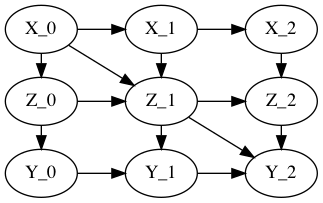

## Optimal sequence of interventions

In [17]:
from sequential_causal_functions import sequential_sample_from_model
from utilities import calculate_best_intervention_and_effect
from sequential_intervention_functions import make_sequential_intervention_dictionary

In [18]:
best_s_values, best_s_sequence, best_objective_values, y_stars_all, optimal_interventions, all_CE = \
optimal_sequence_of_interventions(exploration_sets, interventional_grids, 
                                  initial_structural_equation_model,structural_equation_model,NS_toy_GRAPH,T=T)


t == 0
X [5.0, None, None]
Y [None, None, None]
Z [20.0, None, None]


t == 1
X [None, 5.0, None]
Y [None, None, None]
Z [-3.2323232323232323, 20.0, None]


t == 2
X [None, -0.050505050505050164, 5.0]
Y [None, None, None]
Z [-3.2323232323232323, None, 20.0]




### $t=0$

In [19]:
GT = []
optimal_assigned_blankets = [None, None, None]

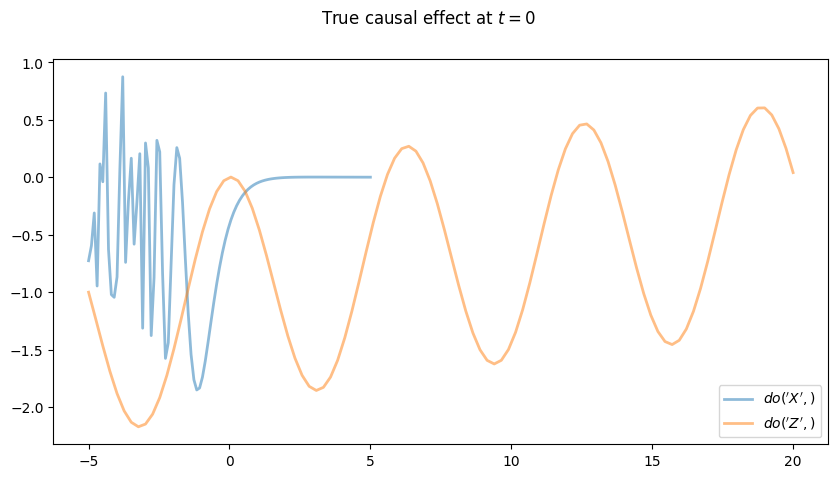

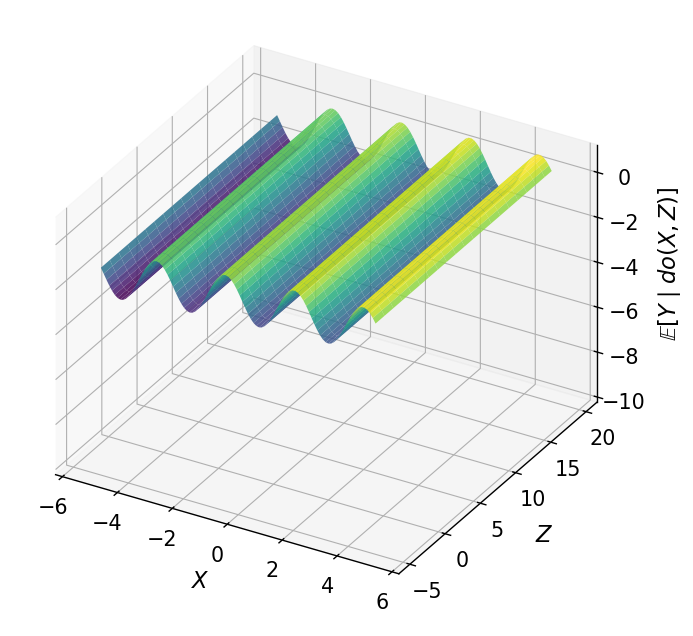


Best exploration set: [('Z',), ('X', 'Z')]
Best intervention level: [-3.23232323]
Best best outcome value: -2.171295791504807

Next blanket:

{'X': [None, None, None], 'Y': [-2.171295791504807, None, None], 'Z': [-3.2323232323232323, None, None]}


In [20]:
blanket, _ = make_sequential_intervention_dictionary(NS_toy_GRAPH)
blanket1, true_causal_effect  = calculate_best_intervention_and_effect(
                                      static_sem=initial_structural_equation_model,
                                      dynamic_sem=structural_equation_model,
                                      exploration_sets=exploration_sets,
                                      interventional_grids=interventional_grids,
                                      time=0,
                                      intervention_domain=intervention_domain,
                                      blanket=deepcopy(blanket))
GT.append(true_causal_effect)

### $t=1$

In [21]:
tt=1

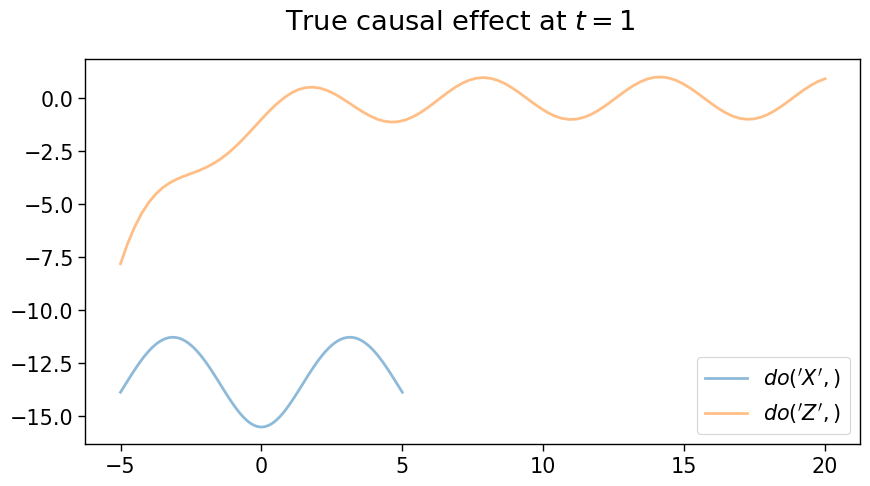

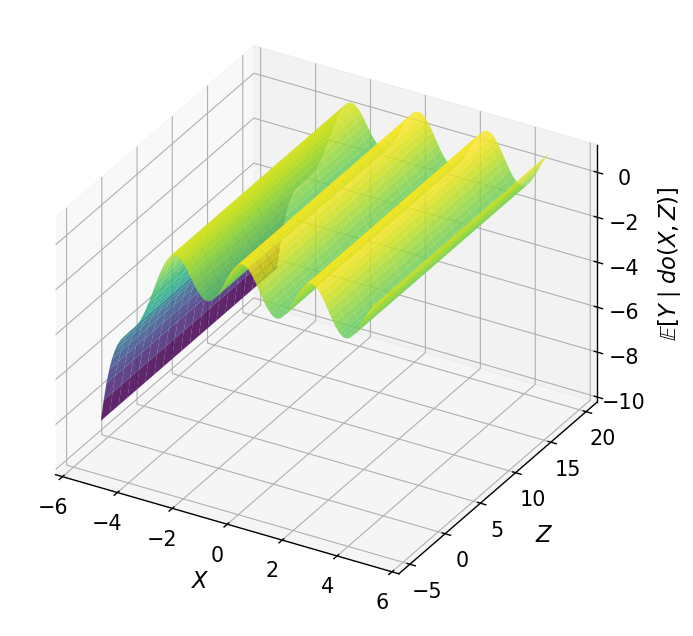


Best exploration set: [('X',)]
Best intervention level: [-0.05050505]
Best best outcome value: -15.508636270534135

Next blanket:

{'X': [None, -0.050505050505050164, None], 'Y': [-2.171295791504807, -15.508636270534135, None], 'Z': [-3.2323232323232323, None, None]}


In [22]:
blanket2, true_causal_effect = calculate_best_intervention_and_effect(
                                      static_sem=initial_structural_equation_model,
                                      dynamic_sem=structural_equation_model,
                                      exploration_sets=exploration_sets,
                                      interventional_grids=interventional_grids,
                                      time=tt,
                                      intervention_domain=intervention_domain,
                                      blanket= deepcopy(blanket1))
GT.append(true_causal_effect)

### $t=2$

In [23]:
tt=2

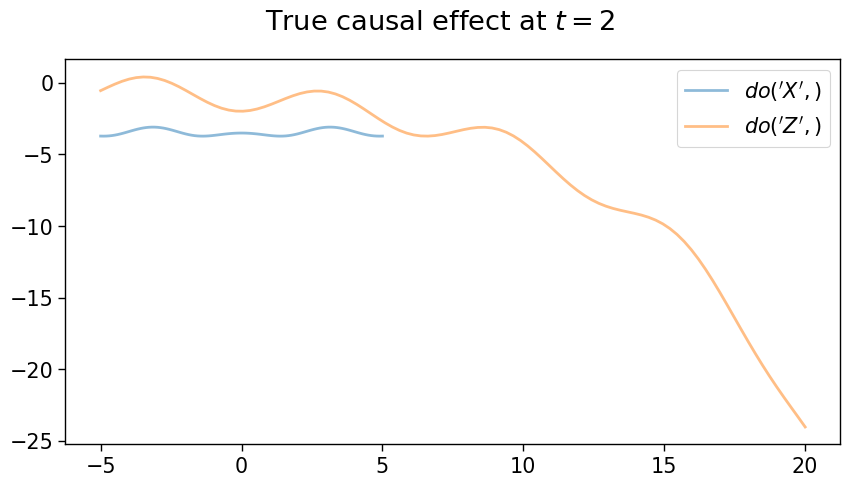

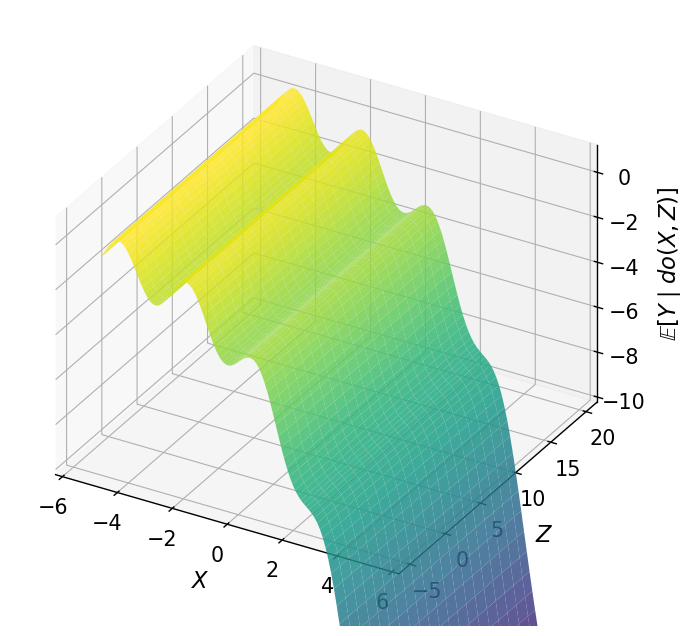


Best exploration set: [('Z',), ('X', 'Z')]
Best intervention level: [20.]
Best best outcome value: -24.028721181540746

Next blanket:

{'X': [None, -0.050505050505050164, None], 'Y': [-2.171295791504807, -15.508636270534135, -24.028721181540746], 'Z': [-3.2323232323232323, None, 20.0]}


In [24]:
blanket3, true_causal_effect = calculate_best_intervention_and_effect(
                                      static_sem=initial_structural_equation_model,
                                      dynamic_sem=structural_equation_model,
                                      exploration_sets=exploration_sets,
                                      interventional_grids=interventional_grids,
                                      time=tt,
                                      intervention_domain=intervention_domain,
                                      blanket= deepcopy(blanket2))
GT.append(true_causal_effect)

In [25]:
optimal_assigned_blankets[2] = blanket2
optimal_assigned_blankets[1] = blanket1

In [26]:
optimal_assigned_blankets

[None,
 {'X': [None, None, None],
  'Y': [-2.171295791504807, None, None],
  'Z': [-3.2323232323232323, None, None]},
 {'X': [None, -0.050505050505050164, None],
  'Y': [-2.171295791504807, -15.508636270534135, None],
  'Z': [-3.2323232323232323, None, None]}]

In [27]:
best_objective_values = [-2.171295791504807, -15.508636270534135, -24.028721181540746]


## Plot true functions 

In [28]:
plot_params = {
    "linewidth": 3,
    "linewidth_opt": 4,
    "alpha": 0.1,
    "xlim_max": 20,
    "ncols": 2,
    "loc_legend": "upper center",
    "size_ticks": 20,
    "size_labels": 20,

    "labels": {'DCBO': 'DCBO', 'CBO': 'CBO', 'ABO': 'ABO', 'BO': 'GP', 'True': '$\mathbb{E}[Y_t| do(X_{st}^\star = x_{st}^\star)$'},
    "colors": {'DCBO': 'blue', 'CBO': 'green', 'ABO': 'orange', 'BO': 'black', 'True': 'red'},
    "line_styles": {'DCBO': '-', 'CBO': '--', 'ABO': 'dashdot', 'BO': '-', 'True': '-'},
    
    # These are for the plot of the true functions 
    "subplot_hspace":0.2,
    "subplot_wspace":.05,
    "size_plot_true_fnc": (13, 3),
    #"size_plot_true_fnc_xlabel": r"$\mathrm{do}(X = x) / \mathrm{do}(Z = z)$",
    "size_plot_true_fnc_xlabel": r"$x_t / z_t$",
    "label_do_X": r'$\mathbb{E}[Y_t \mid \mathrm{do}(X_t = x_t), I_{0:t-1}]$',
    "label_do_Z": r'$\mathbb{E}[Y_t \mid \mathrm{do}(Z_t = z_t), I_{0:t-1}]$',
    "label_true_points": '$X_{s,t}^\star, x_{s,t}^\star$',
    "loc_legend": "lower right",
    "size_legend": 15,
}

In [29]:
color_z = 'black'
color_x = 'black'
linestyle_z = '--'
linestyle_x = '-'
linewidth = 2
marker_true = "^"
color_true = 'red'
size_marker = 50

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')
plt.rc('font', family='serif')
plt.rc('font', size=20)

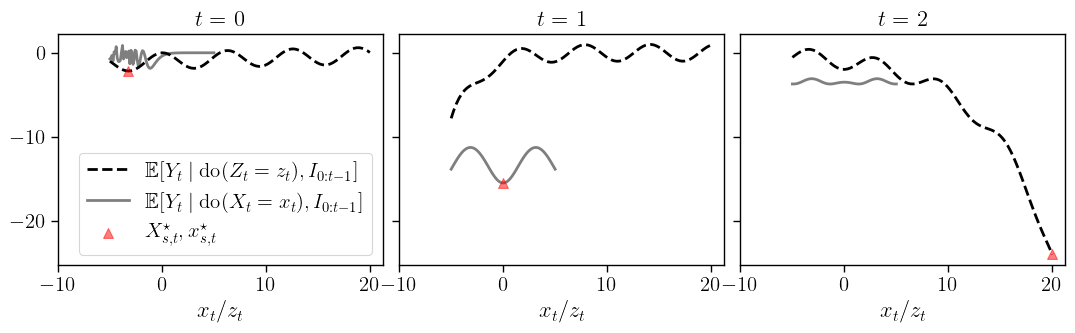

In [30]:
fig, axs = plt.subplots(1, T, figsize=plot_params["size_plot_true_fnc"], sharey=True)
for t in range(T):
    opt_values = (y_stars_all[('X',)][t] ,y_stars_all[('Z',)][t])
    opt_set = exploration_sets[np.argmin(opt_values)]
    y_value = opt_values[np.argmin(opt_values)]
    x_value = interventional_grids[opt_set][GT[t][opt_set] == y_value]
    if x_value.shape[0]>1:
        x_value = x_value[0]
        
    axs[t].set_title("$t = $"+ " " + str(t))
    axs[t].set_xlabel(plot_params["size_plot_true_fnc_xlabel"])
    
    axs[t].plot(interventional_grids[('Z',)],all_CE[t][('Z',)], 
                color = color_z, linestyle = linestyle_z , linewidth = linewidth, 
                label = plot_params["label_do_Z"],alpha=1)
    
    axs[t].plot(interventional_grids[('X',)],all_CE[t][('X',)], 
                color = color_x, linestyle = linestyle_x ,linewidth = linewidth,  
                label = plot_params["label_do_X"],alpha=0.5)
    
    axs[t].scatter(x_value, y_value, s = size_marker, marker = marker_true,alpha=0.5, color = color_true, 
                   label = plot_params["label_true_points"], zorder=10)
    axs[t].set_xticks([-10,0,10,20])

    if t == 0: axs[t].legend(frameon=True,loc=plot_params["loc_legend"], prop={'size': plot_params["size_legend"]})
        
plt.subplots_adjust(hspace=plot_params['subplot_hspace'], wspace=plot_params['subplot_wspace'])
plt.show()

## Observational samples (multivariate time-series)

In [31]:
from sequential_causal_functions import sequential_sample_from_model
from utilities import convert_to_dict_of_temporal_lists

In [32]:
N = 3 # Number of independent samples per time-index
T = 3
np.random.seed(2)
observational_samples = sequentially_sample_model(initial_structural_equation_model,
                                                  structural_equation_model,
                                                  total_timesteps=T,
                                                  sample_count=N)

In [33]:
observational_samples

{'X': array([[-0.41675785, -0.47302467, -2.60922077],
        [-0.90900761, -0.35755357,  1.93465444],
        [-0.74787095, -0.7388457 , -1.61695359]]),
 'Z': array([[ 3.15730592, -5.30129469,  4.07096643],
        [ 2.52339774, -4.71976441,  5.2604939 ],
        [ 1.95606344, -4.87420348,  4.57812925]]),
 'Y': array([[-1.35095994, -3.35705436, -2.45742322],
        [-2.29255074, -7.70644014, -2.64088653],
        [-1.62145603, -3.87123097, -2.43535478]])}

In [34]:
#np.save('../data/non_stationary/optimal_assigned_blankets.npy', optimal_assigned_blankets) 

# CBO

In [35]:
from cbo import CBO

In [36]:
CBO_input_params = {
    "graph": NS_toy_graph, 
    "sem": NonStationarySEM,
    "make_sem_hat": make_sem_hat,
    "observational_samples": observational_samples,
    "intervention_domain": intervention_domain,
    "interventional_samples": None,   
    "number_of_trials": 3, 
    "gt": GT,
    "debug_mode": True,
    "optimal_assigned_blankets": optimal_assigned_blankets,
}

Time index:   0%|          | 0/3 [00:00<?, ?it/s]


				>>>DEBUG MODE: removing multivariate interventions.


Node and node children in this graph:
{'X_0': ['Z_0', 'X_1', 'Z_1'], 'Z_0': ['Y_0', 'Z_1'], 'Y_0': ['Y_1'], 'X_1': ['Z_1', 'X_2'], 'Z_1': ['Y_1', 'Z_2', 'Y_2'], 'Y_1': ['Y_2'], 'X_2': ['Z_2'], 'Z_2': ['Y_2'], 'Y_2': []}

Transition function inputs and outputs across time:
{('X_0',): 'X_1', ('X_0', 'Z_0'): 'Z_1', ('Y_0',): 'Y_1', ('X_1',): 'X_2', ('Z_1',): 'Z_2', ('Z_1', 'Y_1'): 'Y_2'}

OBS: emission function structure is constant across time.
Time: 0


>>>
Iteration: 0
<<<


Time: 0
Iter: 0
### Emissions ###


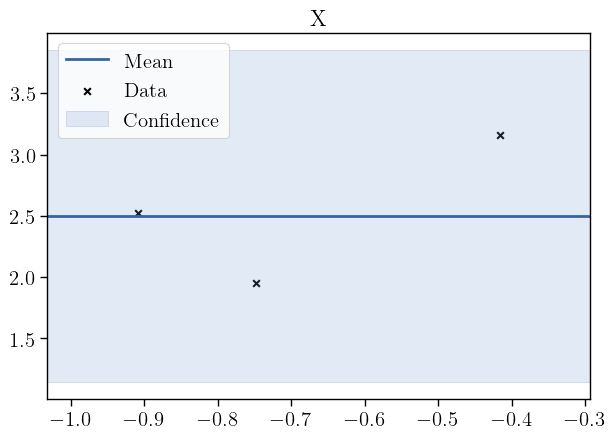

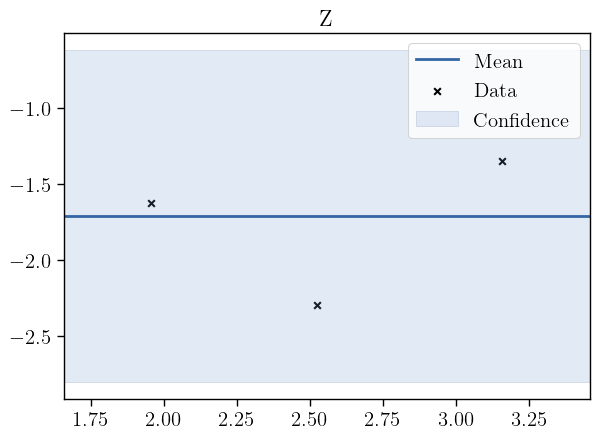



>>>
Iteration: 1
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 0.

Assigned blanket {'X': [None, None, None], 'Y': [None, None, None], 'Z': [None, None, None]}


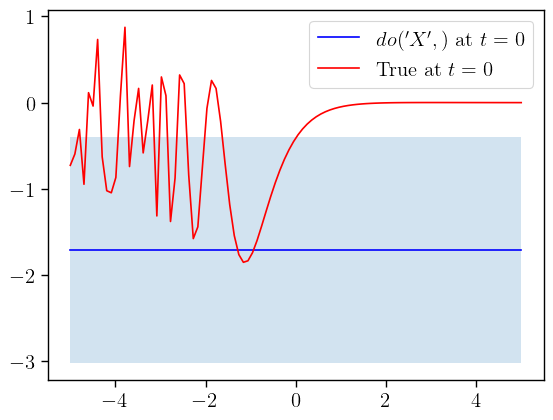


		[0] The BO model does not exists for ES: ('Z',) at t == 0.

Assigned blanket {'X': [None, None, None], 'Y': [None, None, None], 'Z': [None, None, None]}


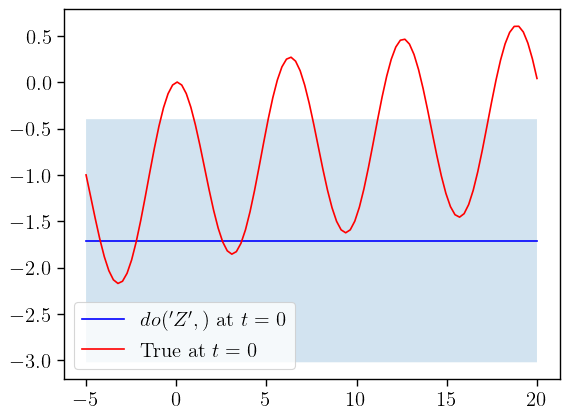

Selected set: ('Z',)
Intervention value: [[1.13113113]]
Outcome: -0.519376509881524
Optimization restart 1/1, f = 1.5937098811783752
### Optimized model: ### 
Name : GP regression
Objective : 1.5937098811783752
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1.1070389408769576  |      +ve      |        
  rbf.lengthscale          |                 1.0  |      +ve      |        
  Gaussian_noise.variance  |               1e-05  |   +ve fixed   |        


>>>
Iteration: 2
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 0.

Assigned blanket {'X': [None, None, None], 'Y': [None, None, None], 'Z': [None, None, None]}


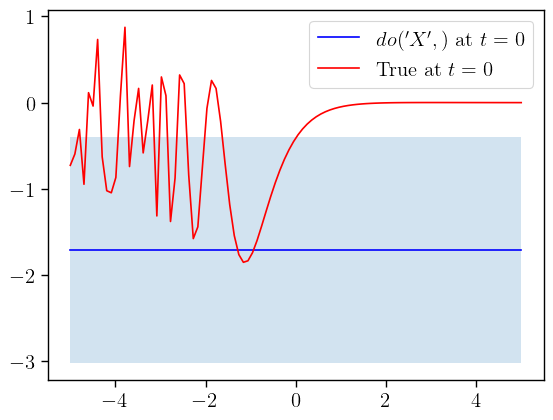


		[1] The BO model exists for ES: ('Z',) at t == 0.

Assigned blanket {'X': [None, None, None], 'Y': [None, None, None], 'Z': [None, None, None]}


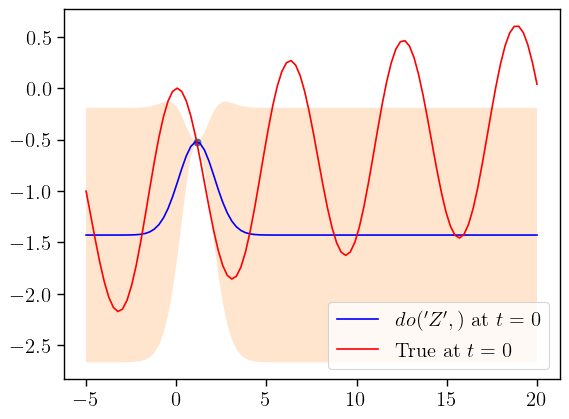

Time index:  33%|███▎      | 1/3 [00:05<00:10,  5.10s/it]

Selected set: ('X',)
Intervention value: [[-1.27627628]]
Outcome: -1.7400043346031804
Optimization restart 1/1, f = 0.3369810968032887
### Optimized model: ### 
Name : GP regression
Objective : 0.3369810968032887
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |  5.562684646268137e-309  |      +ve      |        
  rbf.lengthscale          |                     1.0  |      +ve      |        
  Gaussian_noise.variance  |                   1e-05  |   +ve fixed   |        
Time: 1


>>>
Iteration: 0
<<<


Time: 1
Iter: 0
### Emissions ###


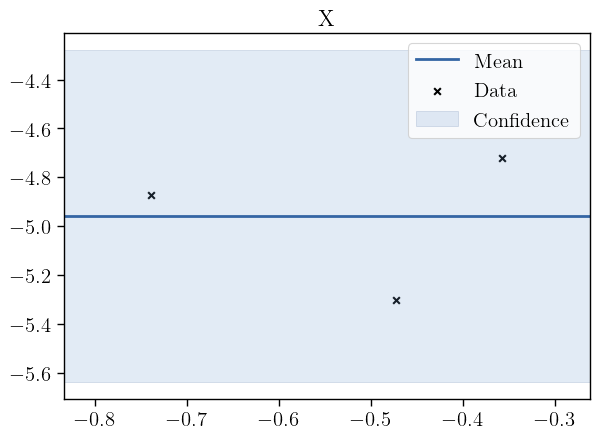

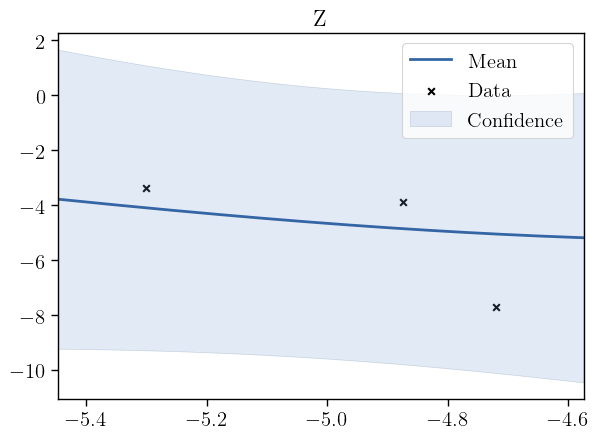



>>>
Iteration: 1
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 1.

Assigned blanket {'X': [-1.2762762762762763, None, None], 'Y': [-1.7400043346031804, None, None], 'Z': [4.506354663164708, None, None]}


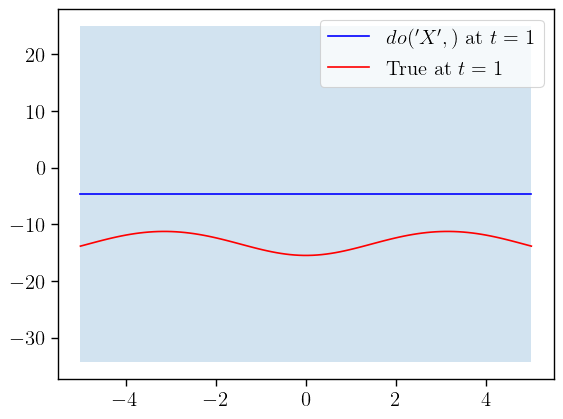


		[0] The BO model does not exists for ES: ('Z',) at t == 1.

Assigned blanket {'X': [-1.2762762762762763, None, None], 'Y': [-1.7400043346031804, None, None], 'Z': [4.506354663164708, None, None]}


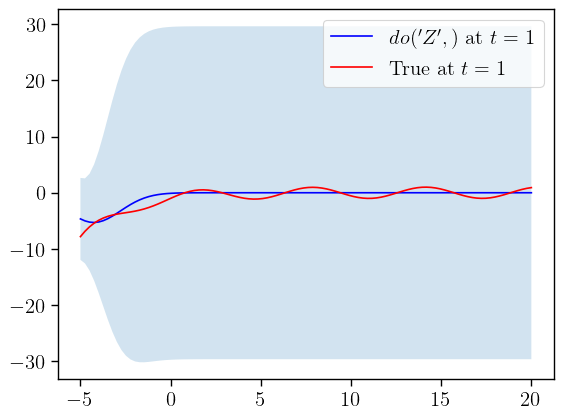

Selected set: ('Z',)
Intervention value: [[-4.24924925]]
Outcome: -5.435188598690233
Optimization restart 1/1, f = 2.034783973812185
### Optimized model: ### 
Name : GP regression
Objective : 2.034783973812185
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |  4.1727541274398195e-67  |      +ve      |        
  rbf.lengthscale          |                     1.0  |      +ve      |        
  Gaussian_noise.variance  |                   1e-05  |   +ve fixed   |        


>>>
Iteration: 2
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 1.

Assigned blanket {'X': [-1.2762762762762763, None, None], 'Y': [-1.7400043346031804, None, None], 'Z': [4.506354663164708, None, None]}


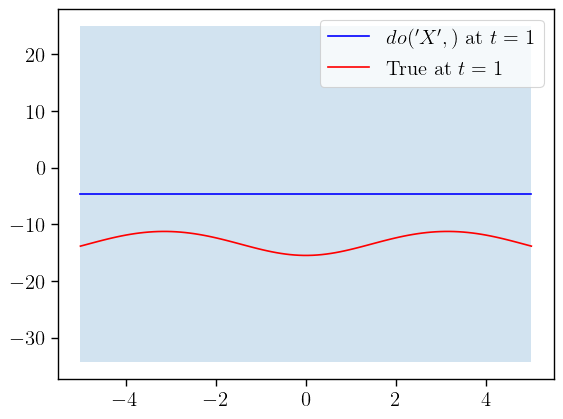


		[1] The BO model exists for ES: ('Z',) at t == 1.

Assigned blanket {'X': [-1.2762762762762763, None, None], 'Y': [-1.7400043346031804, None, None], 'Z': [4.506354663164708, None, None]}


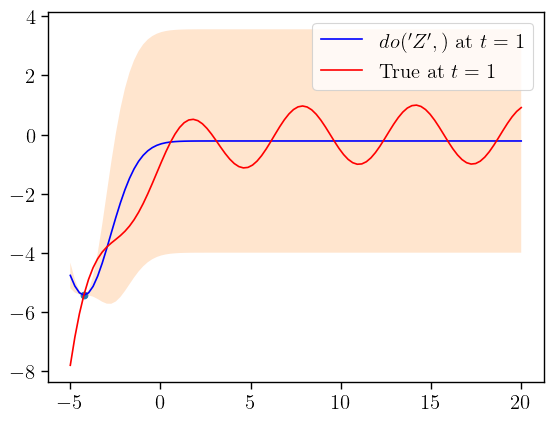

Time index:  67%|██████▋   | 2/3 [00:13<00:07,  7.30s/it]

Selected set: ('X',)
Intervention value: [[5.]]
Outcome: -13.870465710324108
Optimization restart 1/1, f = 3.6324846481354935
### Optimized model: ### 
Name : GP regression
Objective : 3.6324846481354935
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |             value  |  constraints  |  priors
  rbf.variance             |  55.0058286854231  |      +ve      |        
  rbf.lengthscale          |               1.0  |      +ve      |        
  Gaussian_noise.variance  |             1e-05  |   +ve fixed   |        
Time: 2


>>>
Iteration: 0
<<<


Time: 2
Iter: 0
### Emissions ###


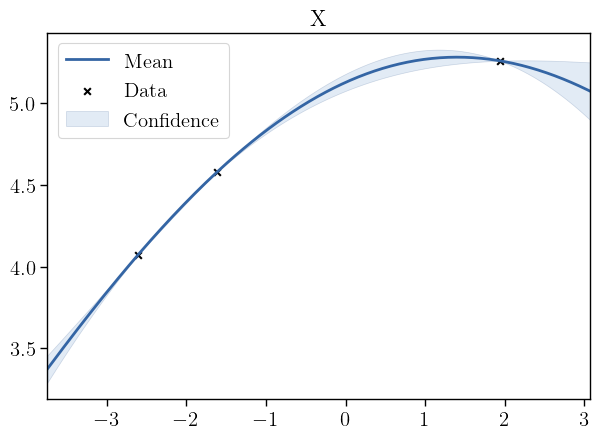

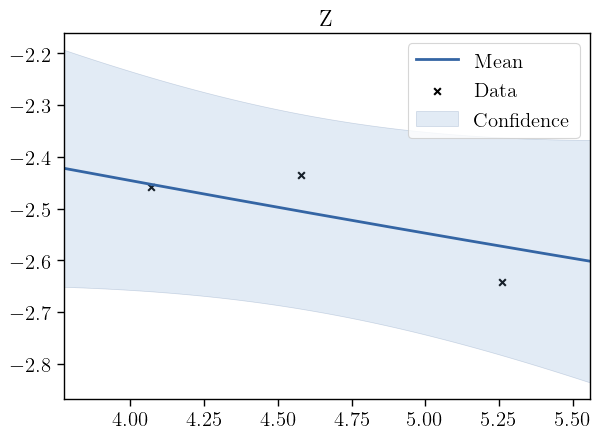



>>>
Iteration: 1
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 2.

Assigned blanket {'X': [-1.2762762762762763, 5.0, None], 'Y': [-1.7400043346031804, -13.870465710324108, None], 'Z': [4.506354663164708, -4.660776573162783, None]}


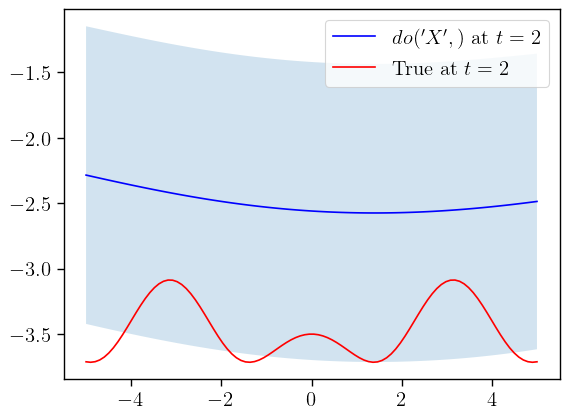


		[0] The BO model does not exists for ES: ('Z',) at t == 2.

Assigned blanket {'X': [-1.2762762762762763, 5.0, None], 'Y': [-1.7400043346031804, -13.870465710324108, None], 'Z': [4.506354663164708, -4.660776573162783, None]}


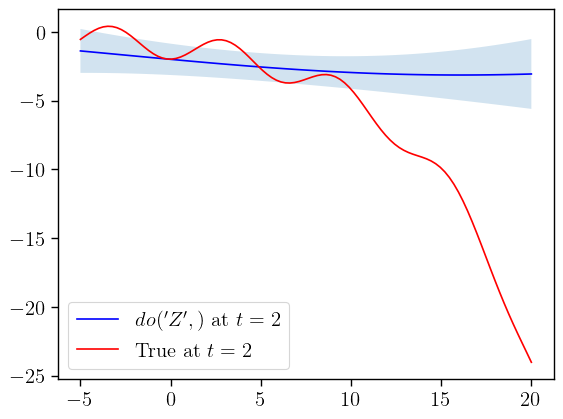

Selected set: ('Z',)
Intervention value: [[16.04604605]]
Outcome: -11.86338414422074
Optimization restart 1/1, f = 3.5858598120907432
### Optimized model: ### 
Name : GP regression
Objective : 3.5858598120907432
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  rbf.variance             |  75.36582380943885  |      +ve      |        
  rbf.lengthscale          |                1.0  |      +ve      |        
  Gaussian_noise.variance  |              1e-05  |   +ve fixed   |        


>>>
Iteration: 2
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 2.

Assigned blanket {'X': [-1.2762762762762763, 5.0, None], 'Y': [-1.7400043346031804, -13.870465710324108, None], 'Z': [4.506354663164708, -4.660776573162783, None]}


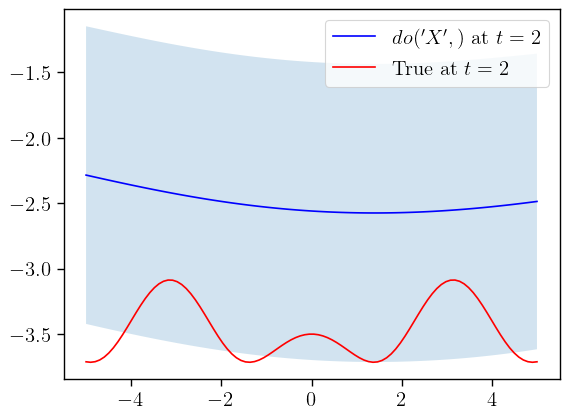


		[1] The BO model exists for ES: ('Z',) at t == 2.

Assigned blanket {'X': [-1.2762762762762763, 5.0, None], 'Y': [-1.7400043346031804, -13.870465710324108, None], 'Z': [4.506354663164708, -4.660776573162783, None]}


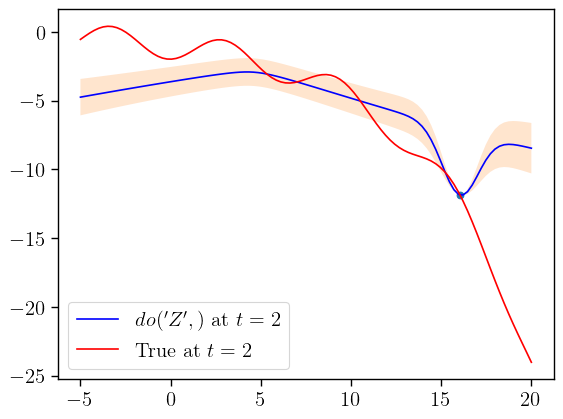

Time index: 100%|██████████| 3/3 [00:26<00:00,  8.92s/it]

Selected set: ('Z',)
Intervention value: [[16.34634635]]
Outcome: -12.673471937864441
Optimization restart 1/1, f = 3.5858598120907432
### Optimized model: ### 
Name : GP regression
Objective : 3.5858598120907432
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  rbf.variance             |  75.36582380943885  |      +ve      |        
  rbf.lengthscale          |                1.0  |      +ve      |        
  Gaussian_noise.variance  |              1e-05  |   +ve fixed   |        


In [37]:
cbo = CBO(**CBO_input_params)
cbo.run_optimization()

# DCBO

In [38]:
from dcbo import DCBO

In [39]:
DCBO_input_params = {
    "graph": NS_toy_graph,
    "sem": NonStationarySEM,
    "make_sem_hat": make_sem_hat,
    "observational_samples": observational_samples,
    "intervention_domain":intervention_domain,
    "interventional_samples": None,  
    "number_of_trials": 3,
    "gt": GT,
    "debug_mode": True,
    "optimal_assigned_blankets": optimal_assigned_blankets,
}

Time index:   0%|          | 0/3 [00:00<?, ?it/s]


				>>>DEBUG MODE: removing multivariate interventions.


Node and node children in this graph:
{'X_0': ['Z_0', 'X_1', 'Z_1'], 'Z_0': ['Y_0', 'Z_1'], 'Y_0': ['Y_1'], 'X_1': ['Z_1', 'X_2'], 'Z_1': ['Y_1', 'Z_2', 'Y_2'], 'Y_1': ['Y_2'], 'X_2': ['Z_2'], 'Z_2': ['Y_2'], 'Y_2': []}

Transition function inputs and outputs across time:
{('X_0',): 'X_1', ('X_0', 'Z_0'): 'Z_1', ('Y_0',): 'Y_1', ('X_1',): 'X_2', ('Z_1',): 'Z_2', ('Z_1', 'Y_1'): 'Y_2'}

OBS: emission function structure is constant across time.
Time: 0


>>>
Iteration: 0
Trials undertaken so far: [[], [], []]
<<<


Time: 0
Iter: 0
### Emissions ###


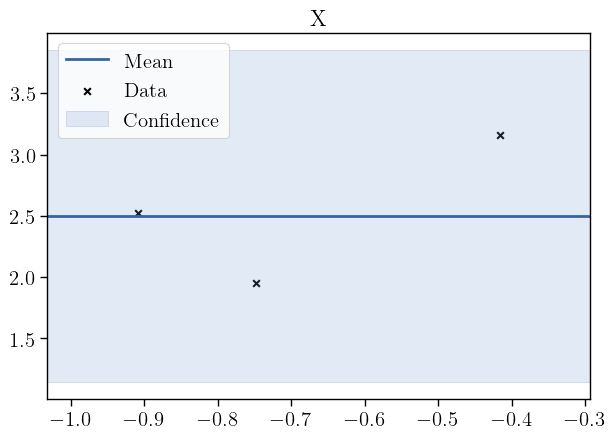

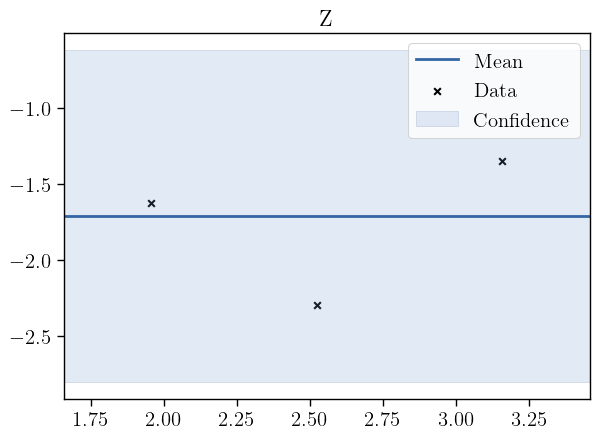

### Transmissions ###


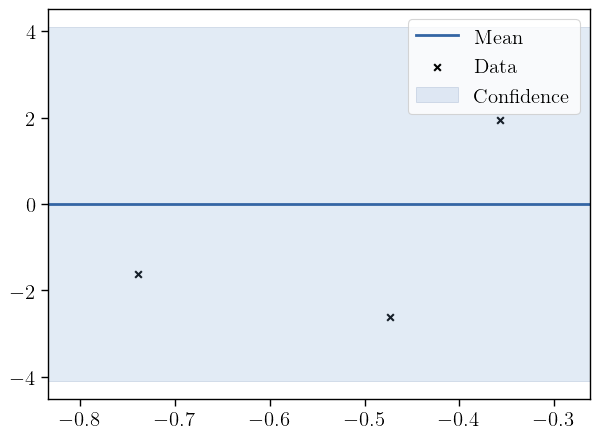

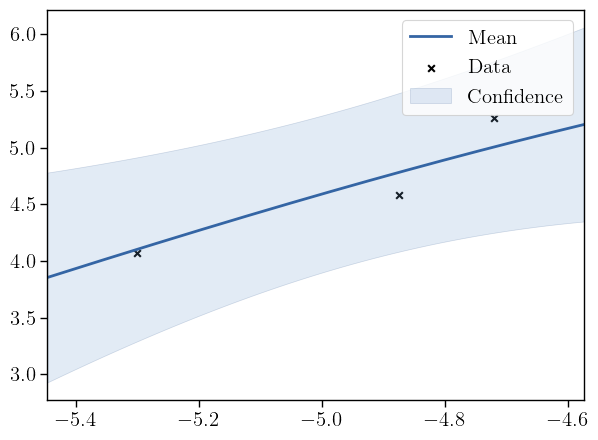

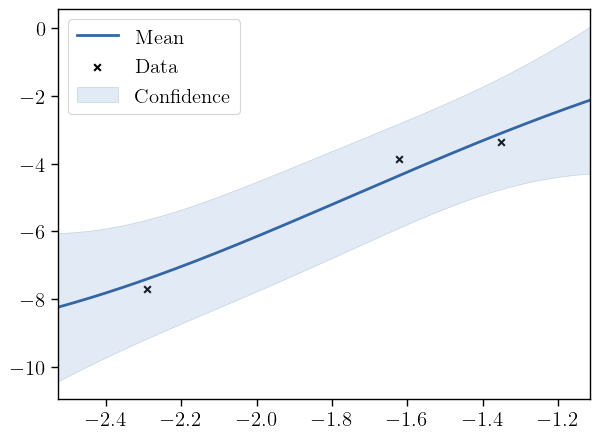



>>>
Iteration: 1
Trials undertaken so far: [['o'], [], []]
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 0.

Assigned blanket {'X': [None, None, None], 'Y': [None, None, None], 'Z': [None, None, None]}


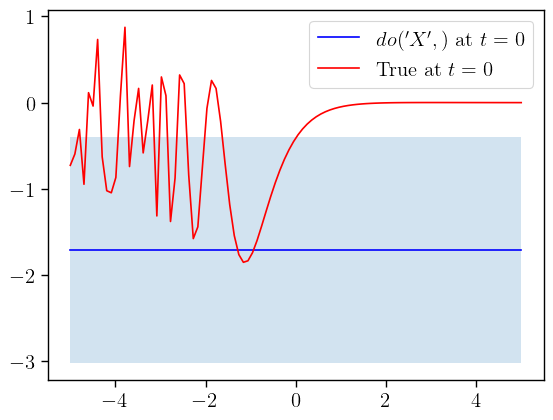


		[0] The BO model does not exists for ES: ('Z',) at t == 0.

Assigned blanket {'X': [None, None, None], 'Y': [None, None, None], 'Z': [None, None, None]}


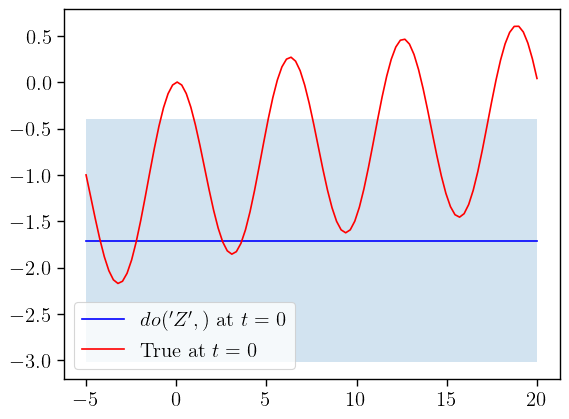

Selected set: ('Z',)
Intervention value: [[1.13113113]]
Outcome: -0.519376509881524
Optimization restart 1/1, f = 1.5937091834981238
### Optimized model: ### 
Name : GP regression
Objective : 1.5937091834981238
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1.1070356964442425  |      +ve      |        
  rbf.lengthscale          |                 1.0  |      +ve      |        
  Gaussian_noise.variance  |               1e-05  |   +ve fixed   |        


>>>
Iteration: 2
Trials undertaken so far: [['o', 'i'], [], []]
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 0.

Assigned blanket {'X': [None, None, None], 'Y': [None, None, None], 'Z': [None, None, None]}


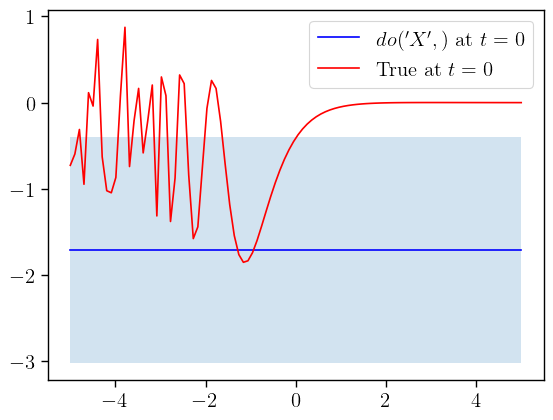


		[1] The BO model exists for ES: ('Z',) at t == 0.

Assigned blanket {'X': [None, None, None], 'Y': [None, None, None], 'Z': [None, None, None]}


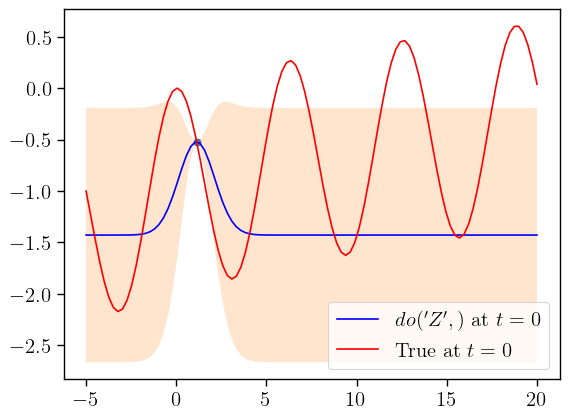

Time index:  33%|███▎      | 1/3 [00:10<00:21, 10.81s/it]

Selected set: ('X',)
Intervention value: [[-1.47647648]]
Outcome: -1.1320921001331221
Optimization restart 1/1, f = 0.8712023895252365
### Optimized model: ### 
Name : GP regression
Objective : 0.8712023895252365
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |  0.023000389203397437  |      +ve      |        
  rbf.lengthscale          |                   1.0  |      +ve      |        
  Gaussian_noise.variance  |                 1e-05  |   +ve fixed   |        
Time: 1


>>>
Iteration: 0
Trials undertaken so far: [['o', 'i', 'i'], [], []]
<<<


Time: 1
Iter: 0
### Emissions ###


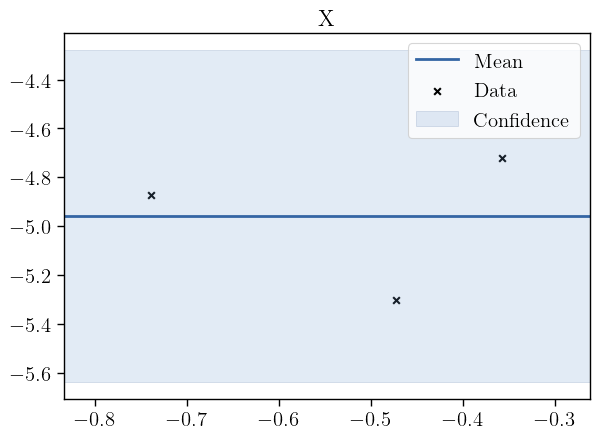

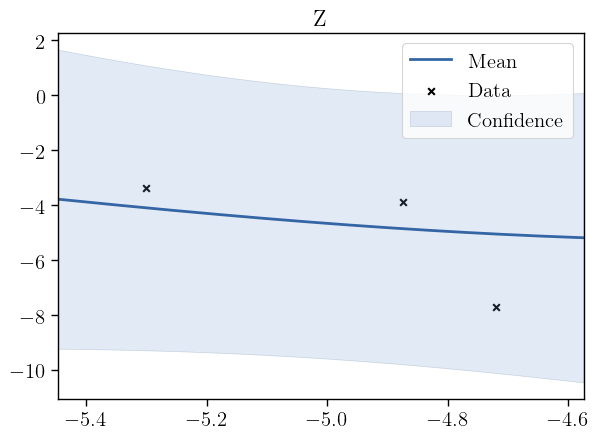

### Transmissions ###


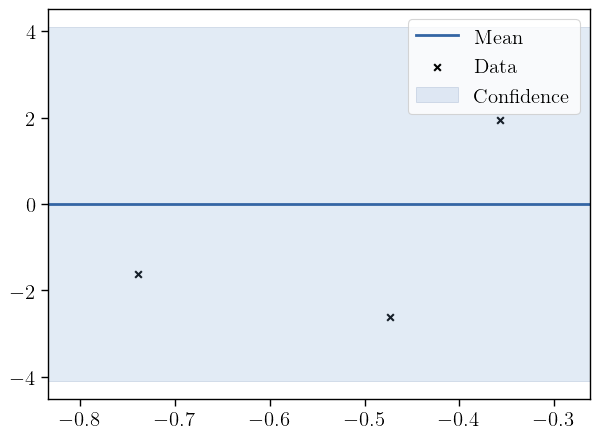

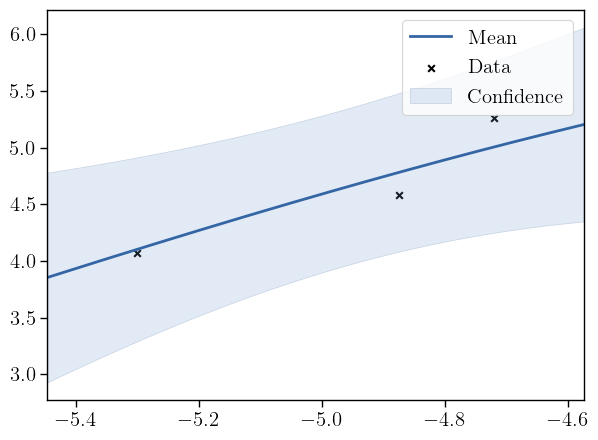

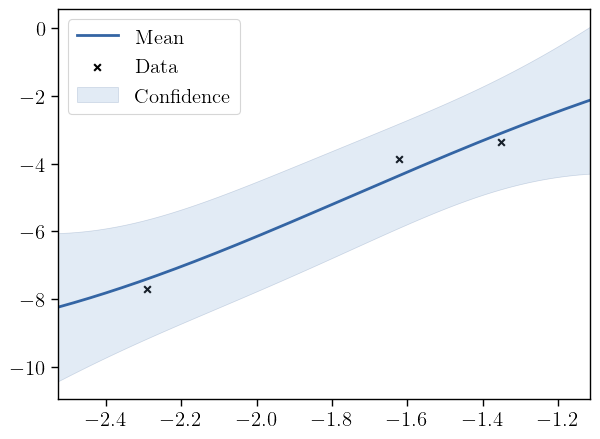



>>>
Iteration: 1
Trials undertaken so far: [['o', 'i', 'i'], ['o'], []]
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 1.

Assigned blanket {'X': [-1.4764764764764764, None, None], 'Y': [-1.1320921001331221, None, None], 'Z': [4.893246203719867, None, None]}


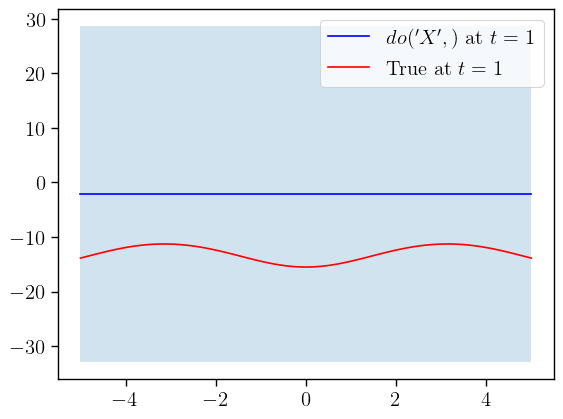


		[0] The BO model does not exists for ES: ('Z',) at t == 1.

Assigned blanket {'X': [-1.4764764764764764, None, None], 'Y': [-1.1320921001331221, None, None], 'Z': [4.893246203719867, None, None]}


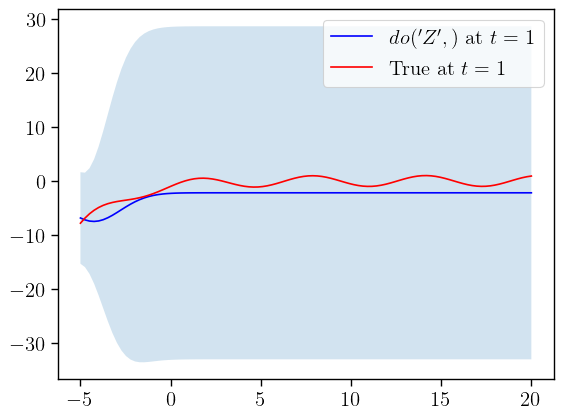

Selected set: ('Z',)
Intervention value: [[-4.24924925]]
Outcome: -5.435188598690233
Optimization restart 1/1, f = 2.2941619787040723
### Optimized model: ### 
Name : GP regression
Objective : 2.2941619787040723
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |  7.023693680521763e-61  |      +ve      |        
  rbf.lengthscale          |                    1.0  |      +ve      |        
  Gaussian_noise.variance  |                  1e-05  |   +ve fixed   |        


>>>
Iteration: 2
Trials undertaken so far: [['o', 'i', 'i'], ['o', 'i'], []]
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 1.

Assigned blanket {'X': [-1.4764764764764764, None, None], 'Y': [-1.1320921001331221, None, None], 'Z': [4.893246203719867, None, None]}


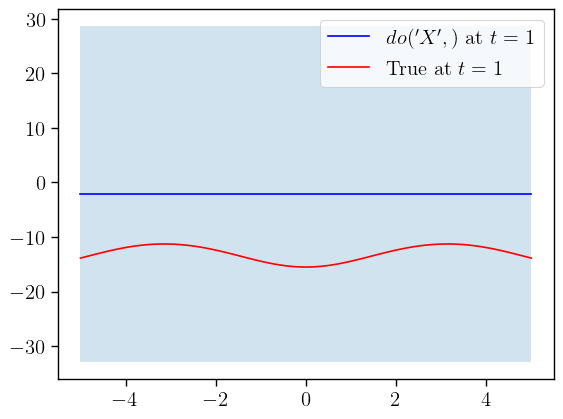


		[1] The BO model exists for ES: ('Z',) at t == 1.

Assigned blanket {'X': [-1.4764764764764764, None, None], 'Y': [-1.1320921001331221, None, None], 'Z': [4.893246203719867, None, None]}


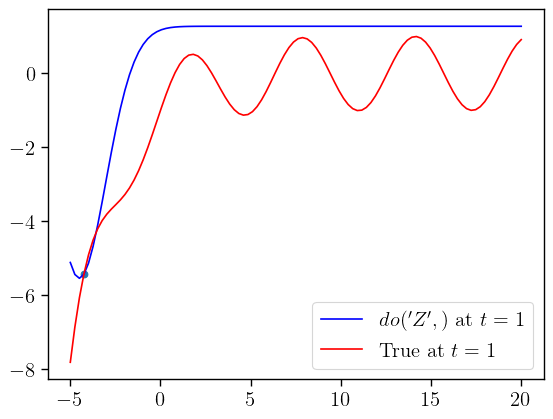

Time index:  67%|██████▋   | 2/3 [00:26<00:13, 13.81s/it]

Selected set: ('X',)
Intervention value: [[-0.78578579]]
Outcome: -14.822964634326054
Optimization restart 1/1, f = 3.957261305958967
### Optimized model: ### 
Name : GP regression
Objective : 3.957261305958967
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  130.25484555770535  |      +ve      |        
  rbf.lengthscale          |                 1.0  |      +ve      |        
  Gaussian_noise.variance  |               1e-05  |   +ve fixed   |        
Time: 2


 /Users/virginiaaglietti/anaconda3/envs/scibo/lib/python3.7/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square




>>>
Iteration: 0
Trials undertaken so far: [['o', 'i', 'i'], ['o', 'i', 'i'], []]
<<<


Time: 2
Iter: 0
### Emissions ###


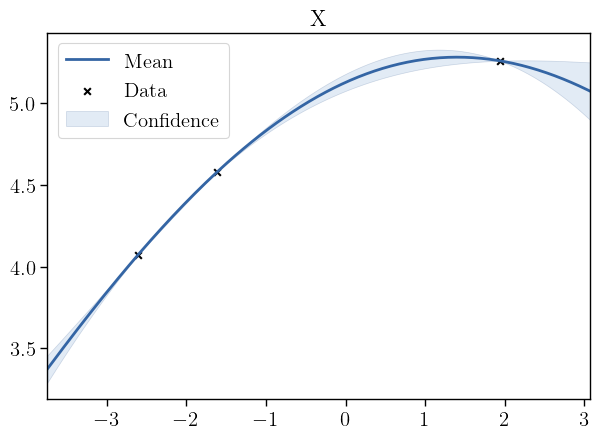

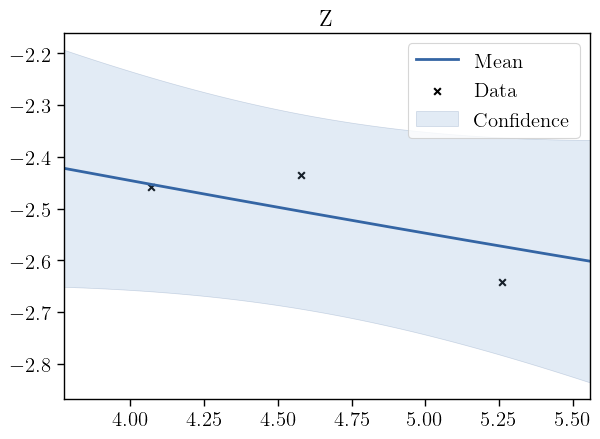

### Transmissions ###


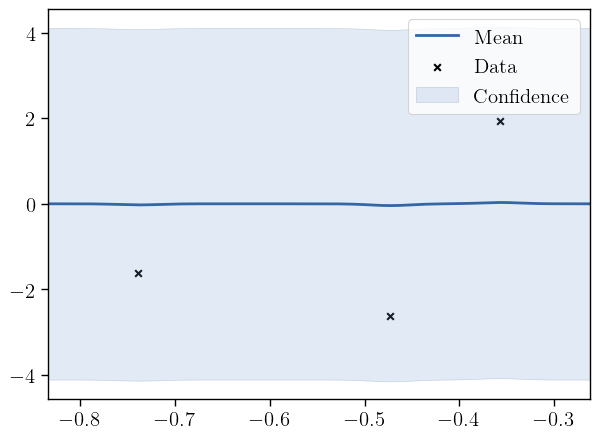

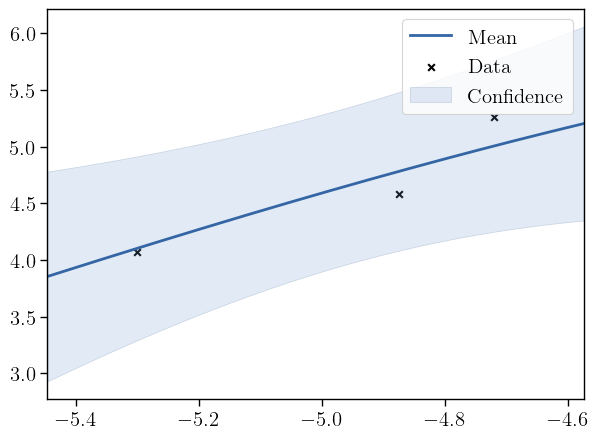

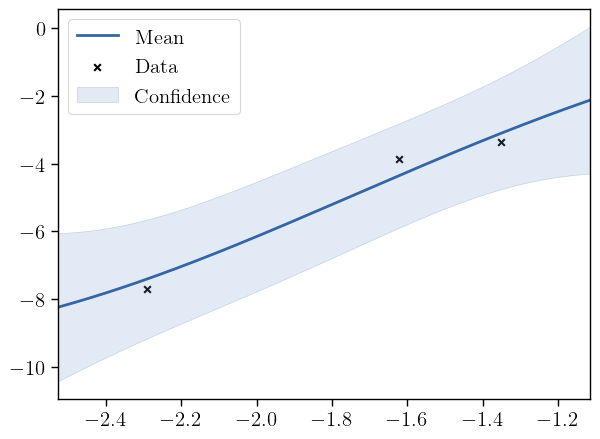



>>>
Iteration: 1
Trials undertaken so far: [['o', 'i', 'i'], ['o', 'i', 'i'], ['o']]
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 2.

Assigned blanket {'X': [-1.4764764764764764, -0.7857857857857855, None], 'Y': [-1.1320921001331221, -14.822964634326054, None], 'Z': [4.893246203719867, -4.379072864753288, None]}


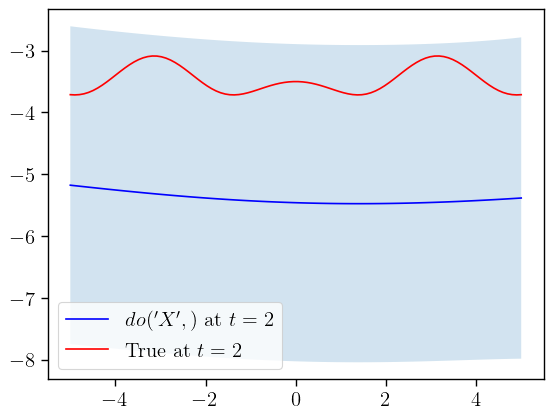


		[0] The BO model does not exists for ES: ('Z',) at t == 2.

Assigned blanket {'X': [-1.4764764764764764, -0.7857857857857855, None], 'Y': [-1.1320921001331221, -14.822964634326054, None], 'Z': [4.893246203719867, -4.379072864753288, None]}


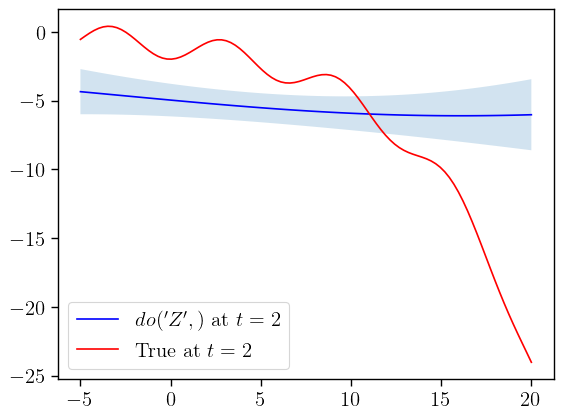

Selected set: ('Z',)
Intervention value: [[16.04604605]]
Outcome: -11.86338414422074
Optimization restart 1/1, f = 19.627381486721692
### Optimized model: ### 
Name : GP regression
Objective : 19.627381486721692
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |  7.023693680521763e-61  |      +ve      |        
  rbf.lengthscale          |                    1.0  |      +ve      |        
  Gaussian_noise.variance  |                  1e-05  |   +ve fixed   |        


>>>
Iteration: 2
Trials undertaken so far: [['o', 'i', 'i'], ['o', 'i', 'i'], ['o', 'i']]
<<<



		[0] The BO model does not exists for ES: ('X',) at t == 2.

Assigned blanket {'X': [-1.4764764764764764, -0.7857857857857855, None], 'Y': [-1.1320921001331221, -14.822964634326054, None], 'Z': [4.893246203719867, -4.379072864753288, None]}


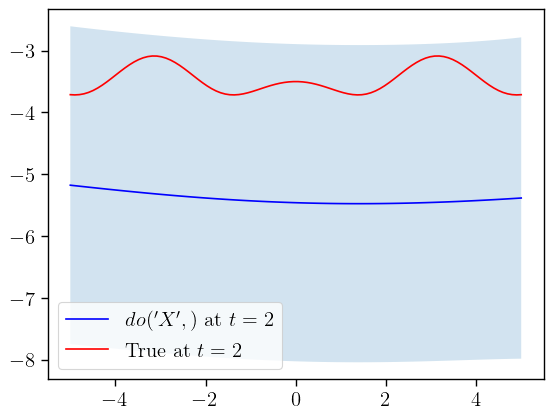


		[1] The BO model exists for ES: ('Z',) at t == 2.

Assigned blanket {'X': [-1.4764764764764764, -0.7857857857857855, None], 'Y': [-1.1320921001331221, -14.822964634326054, None], 'Z': [4.893246203719867, -4.379072864753288, None]}


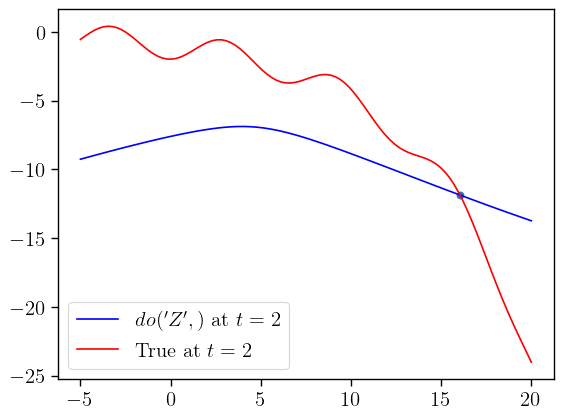

Selected set: ('X',)
Intervention value: [[1.3963964]]
Outcome: -3.717356904848174


Time index: 100%|██████████| 3/3 [00:46<00:00, 15.52s/it]

Optimization restart 1/1, f = 1.9839338108410494
### Optimized model: ### 
Name : GP regression
Objective : 1.9839338108410494
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1.5302565457164885  |      +ve      |        
  rbf.lengthscale          |                 1.0  |      +ve      |        
  Gaussian_noise.variance  |               1e-05  |   +ve fixed   |        


In [40]:
dcbo = DCBO(**DCBO_input_params)
dcbo.run_optimization()

#  Plot DCBO vs CBO

In [41]:
# tex options
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')
plt.rc('font', family='serif')
plt.rc('font', size=20)

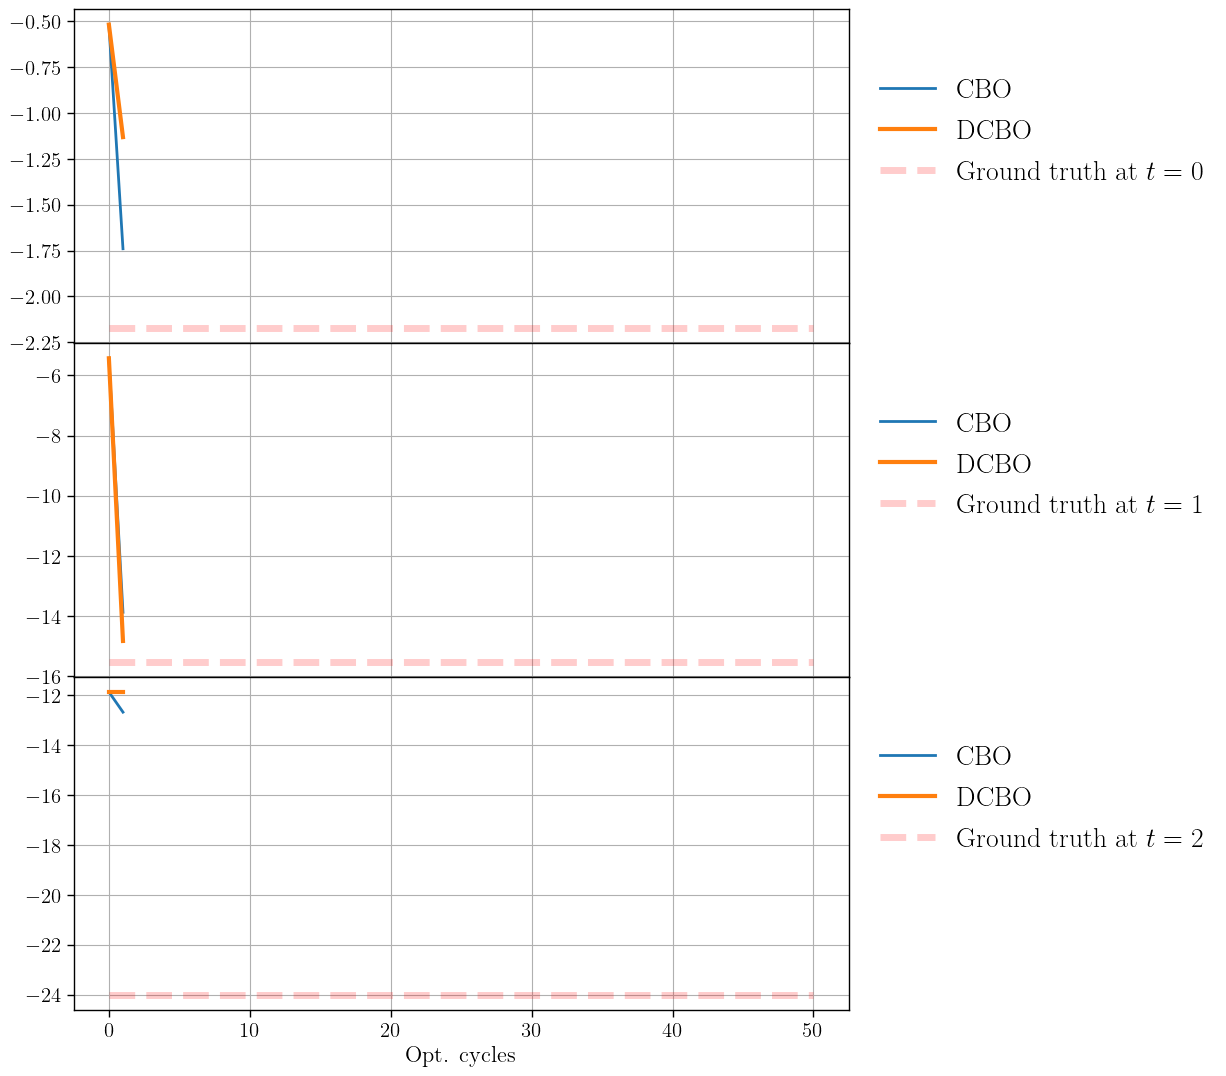

In [42]:
fig, ax = plt.subplots(T, figsize=(10,13), sharex=True)
for i in range(T):
    ax[i].plot(cbo.optimal_outcome_values_during_trials[i][1:],lw=2,label='CBO')
    ax[i].plot(dcbo.optimal_outcome_values_during_trials[i][1:],lw=3,label='DCBO')
    ax[i].hlines(best_objective_values[i],0,50,'r',ls='--',lw=5,alpha=0.2,label='Ground truth at $t={}$'.format(i))
    #ax[i].set_ylabel(r"$\mathbb{{E}}[{}_{} \mid \textrm{{do}}(...),\textrm{{did}}(...) ]$".format("Y", i))
    #ax[i].set_xlim(0, len(cbo.trial_type[1]))
    ax[i].grid(True)
    ax[i].legend(ncol=1, fontsize="medium", loc="lower center", frameon=False, bbox_to_anchor=(1.25, 0.4))
ax[2].set_xlabel(r"Opt. cycles")

plt.subplots_adjust(hspace=0)
plt.show()

In [43]:
mean_CBO = np.mean(np.vstack([cbo.optimal_outcome_values_during_trials[i][1:] for i in range(T)]), axis = 0)
mean_DCBO = np.mean(np.vstack([dcbo.optimal_outcome_values_during_trials[i][1:] for i in range(T)]), axis = 0)

In [44]:
cost_CBO = np.mean(np.vstack([np.cumsum(cbo.per_trial_cost[i]) for i in range(T)]), axis = 0)
cost_DCBO = np.mean(np.vstack([np.cumsum(dcbo.per_trial_cost[i]) for i in range(T)]), axis = 0)


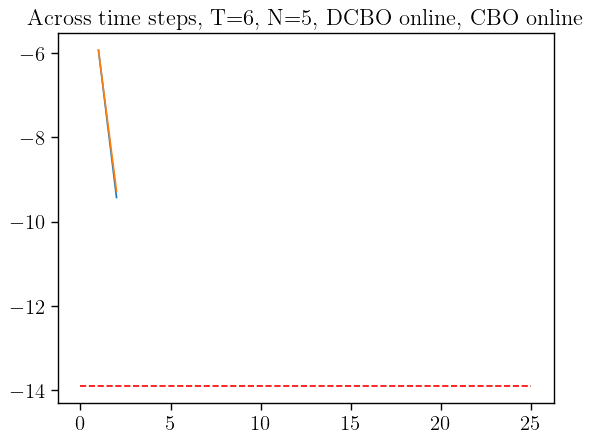

In [45]:
plt.title('Across time steps, T=6, N=5, DCBO online, CBO online')
plt.plot(cost_CBO[1:], mean_CBO)
plt.plot(cost_DCBO[1:], mean_DCBO)
plt.hlines(np.mean([best_objective_values[i] for i in range(T)]),0,25,'r',ls='--')
plt.show()

# ABO

In [46]:
from abo import ABO

In [47]:
ABO_input_params = {
    "graph":NS_toy_graph,
    "sem": NonStationarySEM,
    "make_sem_hat":make_sem_hat,
    "observational_samples": observational_samples,
    "intervention_domain":intervention_domain,
    "interventional_samples": None,   
    "number_of_trials": 3,
    "gt": GT,
    "optimal_assigned_blankets": optimal_assigned_blankets,
}


In [48]:
abo = ABO(**ABO_input_params)
abo.run_optimization()

Time index: 100%|██████████| 3/3 [00:00<00:00, 17.33it/s]

Optimization restart 1/1, f = 1.8964564432315565
Optimization restart 1/1, f = 1.8964564432315565
Optimization restart 1/1, f = 0.4706801737682098
Optimization restart 1/1, f = 4.051391775368984
Optimization restart 1/1, f = 4.051391775368984
Optimization restart 1/1, f = 5.205846936560686
Optimization restart 1/1, f = 9.515254266760975
Optimization restart 1/1, f = 9.515254266760975
Optimization restart 1/1, f = 9.739588156076136


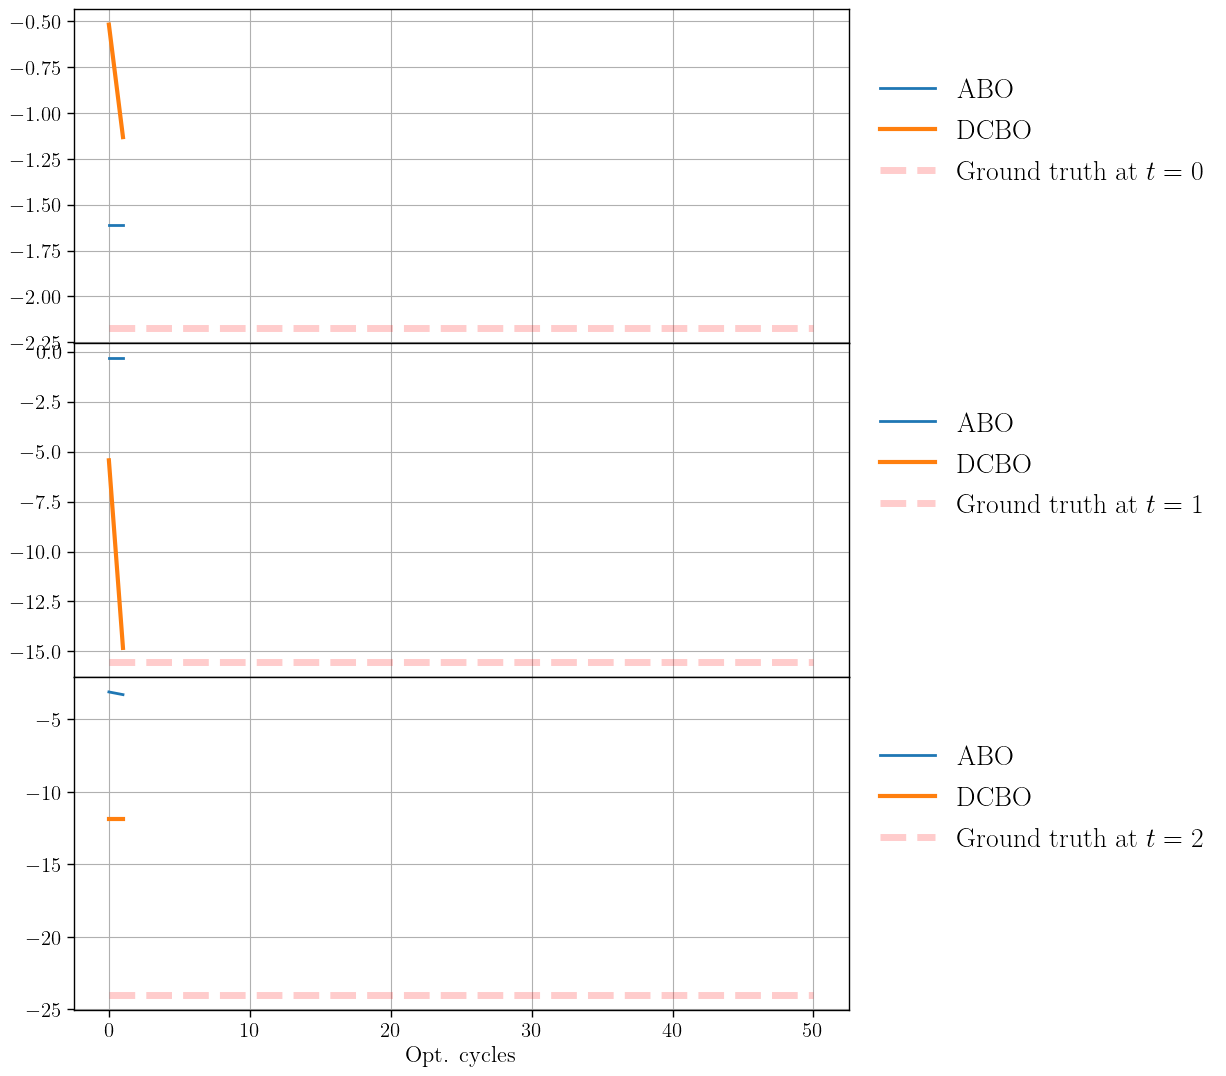

In [49]:
fig, ax = plt.subplots(T, figsize=(10,13), sharex=True)
for i in range(T):
    ax[i].plot(abo.optimal_outcome_values_during_trials[i][1:],lw=2,label='ABO')
    ax[i].plot(dcbo.optimal_outcome_values_during_trials[i][1:],lw=3,label='DCBO')
    ax[i].hlines(best_objective_values[i],0,50,'r',ls='--',lw=5,alpha=0.2,label='Ground truth at $t={}$'.format(i))
    #ax[i].set_ylabel(r"$\mathbb{{E}}[{}_{} \mid \textrm{{do}}(...),\textrm{{did}}(...) ]$".format("Y", i))
    #ax[i].set_xlim(0, len(cbo.trial_type[1]))
    ax[i].grid(True)
    ax[i].legend(ncol=1, fontsize="medium", loc="lower center", frameon=False, bbox_to_anchor=(1.25, 0.4))
ax[2].set_xlabel(r"Opt. cycles")

plt.subplots_adjust(hspace=0)
plt.show()

# BO

In [50]:
from bo import BO

In [51]:
BO_input_params = {
    "graph":NS_toy_graph,
    "sem":NonStationarySEM,
    "make_sem_hat":make_sem_hat,
    "observational_samples": observational_samples,
    "intervention_domain": intervention_domain,
    "interventional_samples":None,   
    "number_of_trials": 3,
    "gt": GT,
    "optimal_assigned_blankets": optimal_assigned_blankets,
}

In [52]:
bo = BO(**BO_input_params)
bo.run_optimization()

Time index: 100%|██████████| 3/3 [00:00<00:00, 17.03it/s]

Optimization restart 1/1, f = 0.6387565633948374
Optimization restart 1/1, f = 0.6387565633948374
Optimization restart 1/1, f = 1.7848912373873087
Optimization restart 1/1, f = 1.2131181507030049
Optimization restart 1/1, f = 1.2131181507030049
Optimization restart 1/1, f = 1.8559815947146912
Optimization restart 1/1, f = 1.8080788448446576
Optimization restart 1/1, f = 1.8080788448446576
Optimization restart 1/1, f = 3.066846575491367


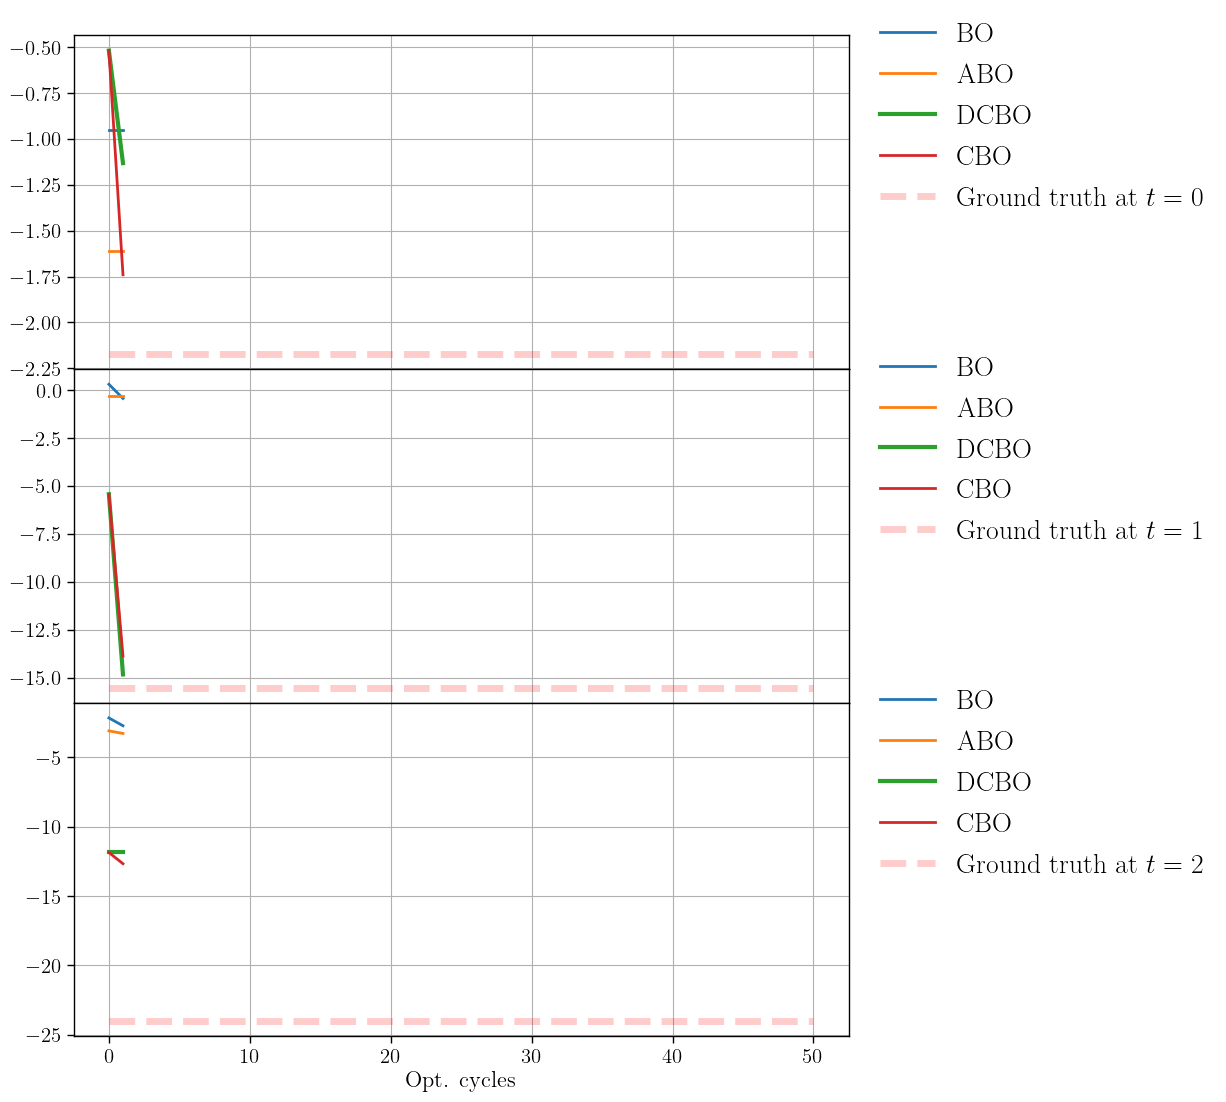

In [53]:
fig, ax = plt.subplots(T, figsize=(10,13), sharex=True)
for i in range(T):
    ax[i].plot(bo.optimal_outcome_values_during_trials[i][1:],lw=2,label='BO')
    ax[i].plot(abo.optimal_outcome_values_during_trials[i][1:],lw=2,label='ABO')
    ax[i].plot(dcbo.optimal_outcome_values_during_trials[i][1:],lw=3,label='DCBO')
    ax[i].plot(cbo.optimal_outcome_values_during_trials[i][1:],lw=2,label='CBO')
    ax[i].hlines(best_objective_values[i],0,50,'r',ls='--',lw=5,alpha=0.2,label='Ground truth at $t={}$'.format(i))
    ax[i].grid(True)
    ax[i].legend(ncol=1, fontsize="medium", loc="lower center", frameon=False, bbox_to_anchor=(1.25, 0.4))
ax[2].set_xlabel(r"Opt. cycles")

plt.subplots_adjust(hspace=0)
plt.show()

In [54]:
# Only 

# Run replicates

In [55]:
from plotting import plot_expected_opt_curve, plot_opt_curve
from experiments import run_methods_replicates

In [ ]:
n_replicates = 1
n_trials = 3
number_of_interventions = None
cost_list = [1]
for cost in cost_list:
    DCBO_results = run_methods_replicates(NS_toy_graph, 
                                         NonStationarySEM, 
                                         make_sem_hat, 
                                         intervention_domain, 
                                         methods_list=['DCBO', 'CBO'],
                                         obs_samples = None,
                                         gt = GT,
                                         total_timesteps = T,
                                         reps = n_replicates,
                                         number_of_trials = n_trials, 
                                         n_restart = 1,
                                         save_data = True,
                                         n_obs = 10,
                                         optimal_assigned_blankets = optimal_assigned_blankets)
    

Experiment count:   0%|          | 0/1 [00:00<?, ?it/s]


	>>>DCBO




Time index:   0%|          | 0/3 [00:00<?, ?it/s]


Node and node children in this graph:
{'X_0': ['Z_0', 'X_1', 'Z_1'], 'Z_0': ['Y_0', 'Z_1'], 'Y_0': ['Y_1'], 'X_1': ['Z_1', 'X_2'], 'Z_1': ['Y_1', 'Z_2', 'Y_2'], 'Y_1': ['Y_2'], 'X_2': ['Z_2'], 'Z_2': ['Y_2'], 'Y_2': []}

Transition function inputs and outputs across time:
{('X_0',): 'X_1', ('X_0', 'Z_0'): 'Z_1', ('Y_0',): 'Y_1', ('X_1',): 'X_2', ('Z_1',): 'Z_2', ('Z_1', 'Y_1'): 'Y_2'}

OBS: emission function structure is constant across time.


 /Users/virginiaaglietti/anaconda3/envs/scibo/lib/python3.7/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Users/virginiaaglietti/anaconda3/envs/scibo/lib/python3.7/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Users/virginiaaglietti/anaconda3/envs/scibo/lib/python3.7/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/1, f = 1.2259210988890399



Time index:  33%|███▎      | 1/3 [00:08<00:17,  8.79s/it]

Optimization restart 1/1, f = 1.5153809772223519
Optimization restart 1/1, f = 3.385039241445646



Time index:  67%|██████▋   | 2/3 [00:21<00:11, 11.05s/it]

Optimization restart 1/1, f = 2.9426755397367574


# ------------------ Only checked up to here ------------------

In [592]:
## Aggregate the results 
data = DCBO_results
data.update(CBO_results)
data.update(BO_results)
data.update(ABO_results)

In [576]:
# Aggregate data
per_trial_cost = {model:[] for model in data.keys()}
optimal_outcome_values_during_trials = {model:[] for model in data.keys()}

for i in range(n_replicates):
    for model in data.keys():
        per_trial_cost[model].append(data[model][i].per_trial_cost)
        optimal_outcome_values_during_trials[model].append(data[model][i].optimal_outcome_values_during_trials)

In [577]:
# Aggregate data
# exp_per_trial_cost = get_cumulative_cost_mean_and_std(per_trial_cost, T, repeats=n_replicates)
# exp_optimal_outcome_values_during_trials = get_mean_and_std(optimal_outcome_values_during_trials, T, repeats=n_replicates)


In [578]:
model_mean_cost = {'BO': [[], [], []], 'ABO': [[], [], []], 'CBO': [[], [], []], 'DCBO': [[], [], []]}
model_mean_output = {'BO': [[], [], []], 'ABO': [[], [], []], 'CBO': [[], [], []], 'DCBO': [[], [], []]}
model_std_output = {'BO': [[], [], []], 'ABO': [[], [], []], 'CBO': [[], [], []], 'DCBO': [[], [], []]}
for model in ['BO', 'ABO', 'CBO', 'DCBO']:
    if model in data.keys():
        for t in range(T):
            cost_t = []
            output_t = []
            for i in range(n_replicates):
                cost_t.append(per_trial_cost[model][i][t])
                output_t.append(optimal_outcome_values_during_trials[model][i][t])

            average_cost = np.mean(np.vstack(cost_t), axis=0)
            average_output = np.mean(np.vstack(output_t), axis=0)
            std_output = np.std(np.vstack(output_t), axis=0)

            model_mean_cost[model][t] = average_cost
            model_mean_output[model][t] = average_output
            model_std_output[model][t] = std_output

In [579]:
for model in ['BO', 'ABO', 'CBO', 'DCBO']:
    if model in data.keys():
        for t in range(T):
            if model_mean_output[model][t][0] == 10000000.0:
                model_mean_output[model][t][0] = model_mean_output[model][t][1]

In [581]:
initial_value_BO_ABO = np.max((data['BO'][0].optimal_outcome_values_during_trials[0], data['ABO'][0].optimal_outcome_values_during_trials[0]))

for model in data.keys():
    if model == 'BO' or model == 'ABO':
        costs = model_mean_cost[model]
        values = model_mean_output[model]
        values_std = model_std_output[model]
        for t in range(T):
            values_t = values[t]
            values_std_t = values_std[t]
            costs[t] = np.asarray([0] + list(costs[t]))
            if t == 0:
                model_mean_output[model][t] = np.asarray([initial_value_BO_ABO] + list(values_t))
                model_std_output[model][t] = np.asarray([values_std_t[0]] + list(values_std_t))
            else:
                model_mean_output[model][t] = np.asarray([values_std_t[0]] + list(values_t))
                model_std_output[model][t] = np.asarray([values_std_t[0]] + list(values_std_t))



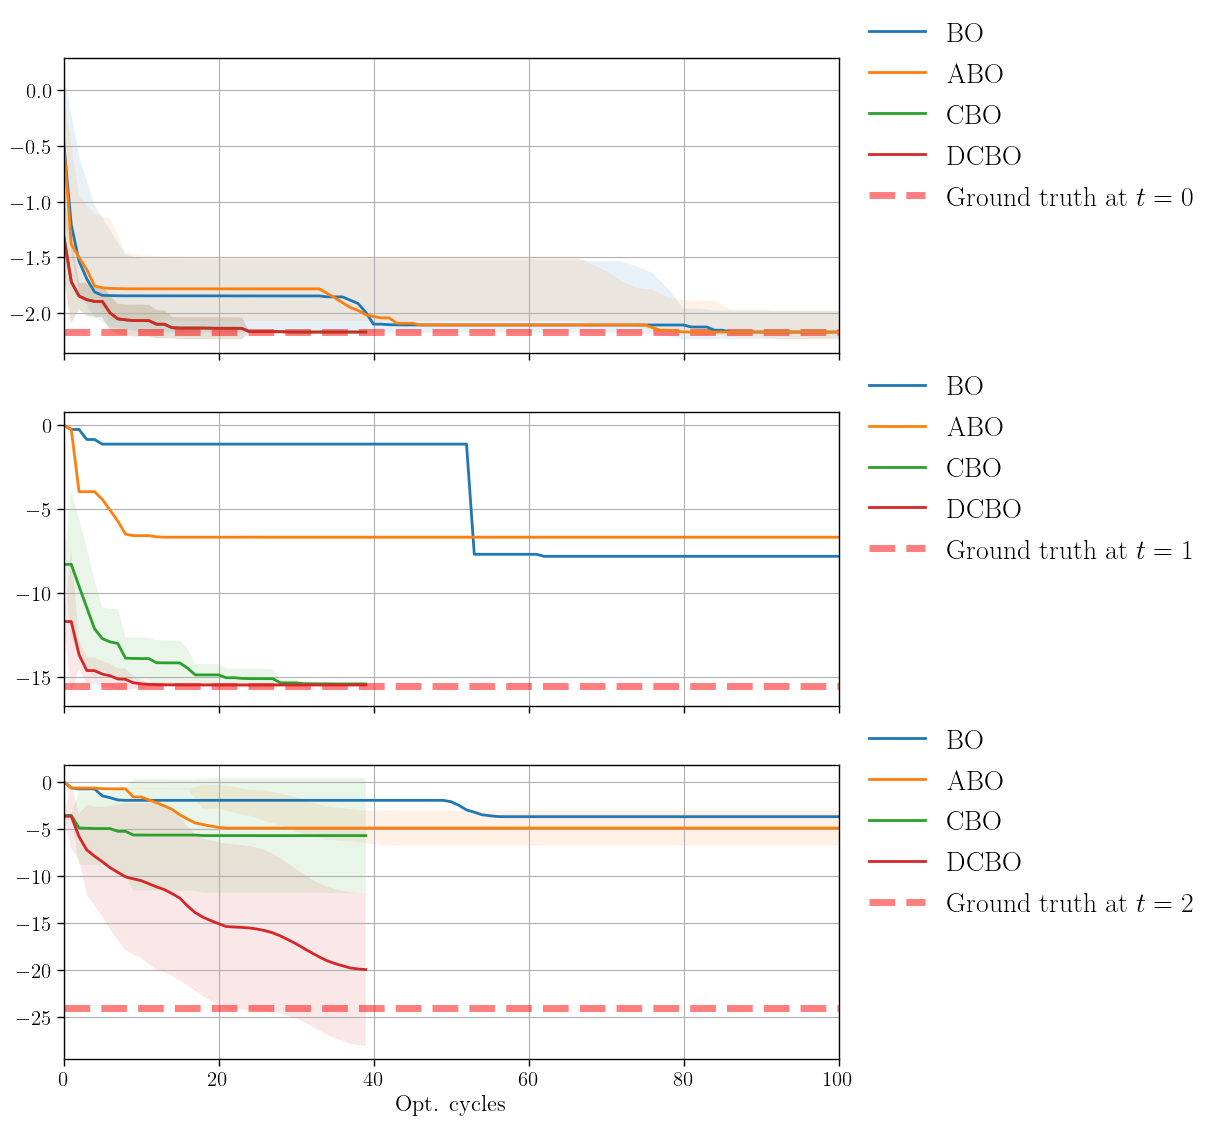

In [585]:
fig, ax = plt.subplots(3, figsize=(10,13), sharex=True)
y_stars = [-2.171295791504807, -4.343100560717371, -6.514891868652599]
for i in range(3):
    for model in ['BO', 'ABO', 'CBO', 'DCBO']:
        ax[i].plot(model_mean_output[model][i],lw=2,label= model)
        cs = np.cumsum(model_mean_cost[model][i])
        lower = model_mean_output[model][i] - model_std_output[model][i]
        upper = model_mean_output[model][i] + model_std_output[model][i]
        ax[i].fill_between(
             cs, 
             lower, upper, alpha = 0.1
             )

    ax[i].hlines(best_objective_values[i],0, 100,'r',ls='--',lw=5,alpha=0.5,label='Ground truth at $t={}$'.format(i))
    ax[i].set_xlim(0,100)
    ax[i].grid(True)
    ax[i].legend(ncol=1, fontsize="medium", loc="lower center", frameon=False, bbox_to_anchor=(1.25, 0.4))
ax[2].set_xlabel(r"Opt. cycles")
plt.subplots_adjust(hspace=0.2)
plt.show()

In [586]:
plot_params = {
    "linewidth": 3,
    "linewidth_opt": 4,
    "alpha": 0.1,
    "xlim_max": 20,
    "xlim_max_list": [20, 30, 70],
    "ncols": 2,
    "loc_legend": "upper center",
    "size_ticks": 20,
    "size_labels": 20,
    "label_x": "Cumulative Cost",
    "size_joint_plot": (20, 7),

    "labels": {'DCBO': 'DCBO', 'CBO': 'CBO', 'ABO': 'ABO', 'BO': 'BO', 'True': '$\mathbb{E}[Y_t| do(X_{st}^\star = x_{st}^\star)$'},
    "colors": {'DCBO': 'blue', 'CBO': 'green', 'ABO': 'orange', 'BO': 'black', 'True': 'red'},
    "line_styles": {'DCBO': '-', 'CBO': '--', 'ABO': 'dashdot', 'BO': '-', 'True': '-'},
    
    # These are for the plot of the true functions 
    "subplot_hspace":0.3,
    "subplot_wspace":.1,
    "size_plot_true_fnc": (13, 3),
    #"size_plot_true_fnc_xlabel": r"$\mathrm{do}(X = x) / \mathrm{do}(Z = z)$",
    "size_plot_true_fnc_xlabel": r"$x_t / z_t$",
    "label_do_X": r'$\mathbb{E}[Y_t \mid \mathrm{do}(X_t = x_t), I_{0:t-1}]$',
    "label_do_Z": r'$\mathbb{E}[Y_t \mid \mathrm{do}(Z_t = z_t), I_{0:t-1}]$',
    "label_true_points": '$X_{s,t}^\star, x_{s,t}^\star$',
    "loc_legend": "upper center",
    "size_legend": 15,
}

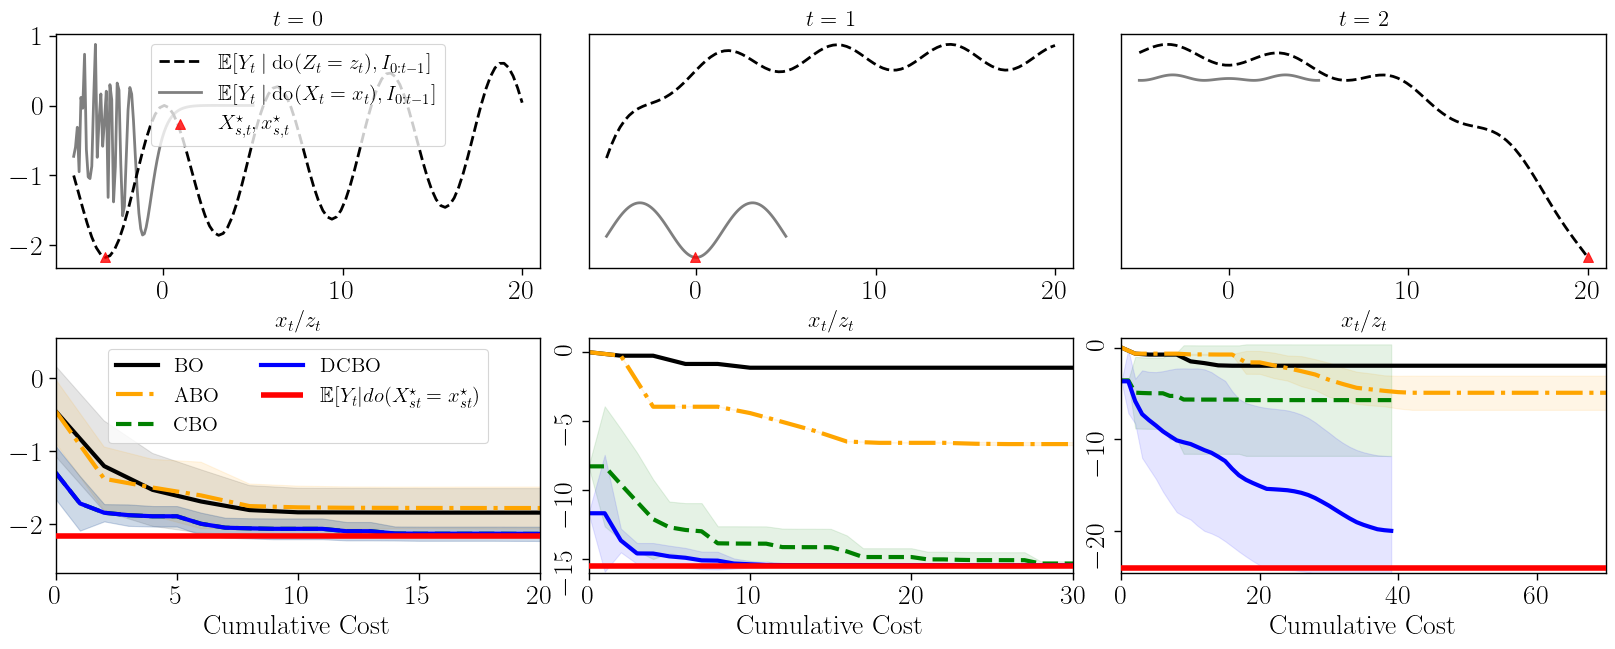

In [589]:
fig, axs = plt.subplots(2, T, figsize=plot_params["size_joint_plot"])

plt.subplots_adjust(hspace=plot_params['subplot_hspace'], wspace=plot_params['subplot_wspace'])

for t in range(T):
    
    ################### FIRST ROW
    opt_values = (y_stars_all[('X',)][t] ,y_stars_all[('Z',)][t])
    opt_set = exploration_sets[np.argmin(opt_values)]
    y_value = opt_values[np.argmin(opt_values)]
    x_value = interventional_grids[opt_set][GT[t][opt_set] == y_value]
    if x_value.shape[0]>1:
        x_value = x_value[0]

    axs[0, t].set_title("$t = $"+ " " + str(t))
    axs[0, t].set_xlabel(plot_params["size_plot_true_fnc_xlabel"])

    axs[0, t].plot(interventional_grids[('Z',)],all_CE[t][('Z',)], 
                    color = color_z, linestyle = linestyle_z , linewidth = linewidth, 
                    label = plot_params["label_do_Z"],alpha=1)

    axs[0, t].plot(interventional_grids[('X',)],all_CE[t][('X',)], 
                    color = color_x, linestyle = linestyle_x ,linewidth = linewidth,  
                    label = plot_params["label_do_X"],alpha=0.5)

    axs[0, t].scatter(x_value, y_value, s = size_marker, marker = marker_true, alpha=0.8, color = color_true, 
                       label = plot_params["label_true_points"], zorder=20)
    axs[0, t].set_xticks([-10,0,10,20])
    
    axs[0,t].tick_params(axis='both', which='major', labelsize= plot_params['size_ticks'])
    axs[0, t].set_xlim(-6., plot_params['xlim_max']+1)
    
    if t == 0: axs[0, t].legend(frameon=True,loc=plot_params["loc_legend"],
                                prop={'size': plot_params["size_legend"]})

 
    ################### SECOND ROW
    
    axs[1,t].tick_params(axis='both', which='major', labelsize= plot_params['size_ticks'])

        
    cs_all = []

    max_y = np.max([model_mean_output[model][t][0] for model in ['BO', 'ABO', 'CBO', 'DCBO']])
    
    for model in ['BO', 'ABO', 'CBO', 'DCBO']:
        cs = np.cumsum(model_mean_cost[model][t])
        cs_max = round(max(cs))
        cs_all.append(cs_max)

        # Mean
        axs[1, t].plot(cs, model_mean_output[model][t], 
                       linewidth=plot_params['linewidth'], 
                       ls= plot_params['line_styles'][model], 
                        label= plot_params['labels'][model],
                        color=plot_params['colors'][model])
        
        # plus/minus one std
        lower = model_mean_output[model][t] - model_std_output[model][t]
        upper = model_mean_output[model][t] + model_std_output[model][t]
        axs[1, t].fill_between(cs, lower, upper, alpha = plot_params['alpha'], color=plot_params['colors'][model])
 

        #Cost
        axs[1, t].set_xlabel(plot_params["label_x"], fontsize = plot_params['size_labels'])
        axs[1, t].set_xlim(0, plot_params['xlim_max_list'][t])

        axs[1, t].set_ylim(best_objective_values[t]-0.5, max_y + 1.)
    
        # Outcome value
        #axs[1, t].set_ylabel("$y_{}^\star$".format(t), fontsize = plot_params['size_labels'])

    # Ground truth   
    axs[1, t].hlines(y= best_objective_values[t], xmin=0, xmax=np.floor(max(cs_all)) + 1., 
                         linewidth=plot_params['linewidth_opt'], color=plot_params['colors']['True'], 
                         ls=plot_params['line_styles']['True'], 
                         label= plot_params['labels']['True'], 
                         zorder = 10
                        )
    # legend
    axs[1, 0].legend(ncol= plot_params['ncols'], 
                        loc=plot_params['loc_legend'], 
                         fontsize= plot_params["size_legend"], frameon=True)
    
    
    axs[1,1].tick_params(axis='y', rotation=90)
    axs[1,2].tick_params(axis='y', rotation=90)
    axs[0,1].set_yticks([])
    axs[0,2].set_yticks([])
plt.show()

In [590]:
fig.savefig('../figures/joint_non_stationary.pdf',bbox_inches="tight")

# Replicates 

In [732]:
import pickle
from utilities import get_cumulative_cost_mean_and_std
from plotting import plot_expected_opt_curve
import datetime

In [1127]:
N_obs = 10
n_replicates = 10
pickle_off = open("../data/non_stationary/method_CBO_nonstationary_runs_T_3_it_40_n_10_Nobs_" + str (N_obs) + ".pickle","rb")
data = pickle.load(pickle_off)


pickle_off = open("../data/non_stationary/method_DCBO_nonstationary_runs_T_3_it_30_n_11_Nobs_" + str (N_obs) + ".pickle","rb")
DCBOdata = pickle.load(pickle_off)

data.update(DCBOdata)


In [1128]:
#pickle_off = open("../data/method_DCBOCBO_synthetic_runs_T_5_t_30_n_10_online_True_Nobs_50_concatDI_False.pickle","rb")
#data = pickle.load(pickle_off)

# n_replicates=5
# pickle_off = open("../data/method_DCBOCBO_synthetic_runs_T_7_t_30_n_10_online_True_Nobs_50_concatDI_False.pickle","rb")
# data = pickle.load(pickle_off)


# T = 7


In [1129]:
# If we dont have initial interventional data we assign the second value as the first to start with 
# To ensure the scale in the plots is not messed up by the initial assigned high value
if number_of_interventions is None:
    for model in data.keys():
        for r in range(n_replicates):
            for t in range(T):
                if data[model][r][1][t][0] == 10000000.0:
                    data[model][r][1][t][0] = data[model][r][1][t][1]

In [1130]:
# Aggregate data
per_trial_cost = {model:[] for model in data.keys()}
optimal_outcome_values_during_trials = {model:[] for model in data.keys()}

for i in range(n_replicates):
    for model in data.keys():
        per_trial_cost[model].append(data[model][i][0])
        optimal_outcome_values_during_trials[model].append(data[model][i][1])

# Aggregate data
exp_per_trial_cost = get_cumulative_cost_mean_and_std(per_trial_cost, T, repeats=n_replicates)
exp_optimal_outcome_values_during_trials = get_mean_and_std(optimal_outcome_values_during_trials, T, repeats=n_replicates)


In [1131]:
# For ABO and BO we make the cost start from 0 as in the competing models
# We then augement the dimension of the y values to plot to ensure they can be plotted 
#initial_value_BO_ABO = np.max((data['BO'][0][1][0], data['ABO'][0][1][0]))

for model in exp_per_trial_cost.keys():
    if model == 'BO' or model == 'ABO':
        costs = exp_per_trial_cost[model]
        values = exp_optimal_outcome_values_during_trials[model]
        for t in range(T):
            values_t = values[t]
            exp_per_trial_cost[model][t] = np.asarray([0] + list(costs[t]))
            if t == 0:
                exp_optimal_outcome_values_during_trials[model][t] = tuple([np.asarray([initial_value_BO_ABO] + list(values_t[0])), np.asarray([0] + list(values_t[1]))])
            else:
                exp_optimal_outcome_values_during_trials[model][t] = tuple([np.asarray([values_t[i][0]] + list(values_t[i])) for i in range(2)])


# Clip values so they are not lower than the min
# for model in exp_per_trial_cost.keys():
#     for t in range(T):
#         clipped = np.clip(exp_optimal_outcome_values_during_trials[model][t][0], a_min = best_objective_values[t], a_max = 0)
#         exp_optimal_outcome_values_during_trials[model][t] = (clipped, exp_optimal_outcome_values_during_trials[model][t][1])


In [1132]:
plot_params = {
    "linewidth": 3,
    "linewidth_opt": 4,
    "alpha": 0.1,
    "xlim_max": 30,
    "ncols": 2,
    "loc_legend": "upper center",
    "size_ticks": 20,
    "size_labels": 20,

    "labels": {'DCBO': 'DCBO', 'CBO': 'CBO', 'ABO': 'ABO', 'BO': 'GP', 'True': '$\mathbb{E}[Y_t| do(X_{st}^\star = x_{st}^\star)$'},
    "colors": {'DCBO': 'blue', 'CBO': 'green', 'ABO': 'orange', 'BO': 'black', 'True': 'red'},
    "line_styles": {'DCBO': '-', 'CBO': '--', 'ABO': 'dashdot', 'BO': '-', 'True': '-'},
}

In [1133]:
def plot_expected_opt_curve(time_index, ground_truth, cost, outcome, plot_params, filename=None):

    sns.set_theme(
        context="paper", style="ticks", palette="deep", font="sans-serif", font_scale=1.3,
    )
    sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

    assert cost.keys() == outcome.keys()

    linewidth = plot_params['linewidth']
    color_true = 'red'
    style_true = '-'
    label_true = 'gt'
    
    width = 5
    fig = plt.figure(figsize=(width, width / 1.61803398875))
    fig = plt.figure(figsize=(7, 3))
    ax = fig.add_subplot(111)

    ax.tick_params(axis='both', which='major', labelsize= plot_params['size_ticks'])

    cs_all = []
    out_all = []
    for i, model in enumerate(cost.keys()):

        cs = cost[model][time_index]
        cs_max = round(max(cs))
        cs_all.append(cs_max)

        a = np.array(outcome[model][time_index])
        # Only valid when task is 'min'
        out_max = np.ceil(a[np.isfinite(a)].max())
        out_all.append(out_max)

        # Mean
        ax.plot(
                cs, outcome[model][time_index][0], 
                linewidth=plot_params['linewidth'], ls= plot_params['line_styles'][model], 
                label= plot_params['labels'][model],
                color=plot_params['colors'][model]
            )
        # plus/minus one std
        lower = outcome[model][time_index][0] - outcome[model][time_index][1]
        upper = outcome[model][time_index][0] + outcome[model][time_index][1]
        
        ax.fill_between(
            cs, lower, upper, alpha= plot_params['alpha'], color = plot_params['colors'][model],
            )

    # Ground truth
    ax.hlines(y=ground_truth, xmin=0, xmax=np.floor(max(cs_all)) + 1., linewidth=plot_params['linewidth_opt'], color=plot_params['colors']['True'], 
                ls=plot_params['line_styles']['True'], label= plot_params['labels']['True'], zorder = 10)

    #  Cost
    ax.set_xlabel("Cumulative Cost", fontsize = plot_params['size_labels'])
    #ax.set_xlim(0, np.floor(max(cs_all)) + 1)
    ax.set_xlim(0, plot_params['xlim_max'])
    ax.set_ylim(ground_truth-0.2, np.max(outcome[model][time_index][0] + outcome[model][time_index][1]) + 1.)
    # Outcome value
    #ax.set_ylabel("$E[Y_{} \mid do(X^s_{} = x^s_{})]$".format(time_index, time_index, time_index))
    ax.set_ylabel("$y_{}^\star$".format(time_index), fontsize = plot_params['size_labels'])
    # ax.set_ylim(np.floor(ground_truth) - 0.5, np.ceil(max(out_all)))
    ax.legend(ncol= plot_params['ncols'], loc=plot_params['loc_legend'], fontsize="large", frameon=True)

    if filename:
        # Set reference time for save
        now = datetime.datetime.now()
        fig.savefig(
            "../figures/synthetic/opt_curves_" + filename + "_" + now.strftime("%d%m%Y_%H%M") + ".pdf",
            bbox_inches="tight",
        )


    #plt.show()
    return fig

<Figure size 500x309.017 with 0 Axes>

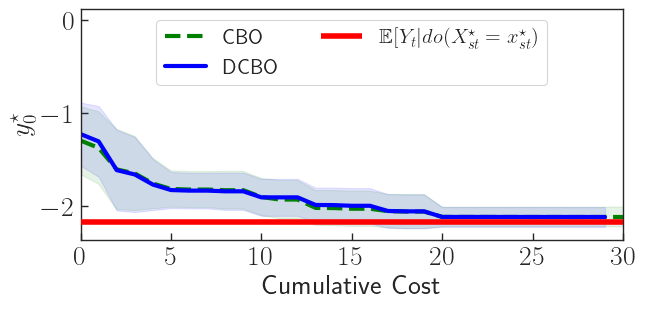

<Figure size 500x309.017 with 0 Axes>

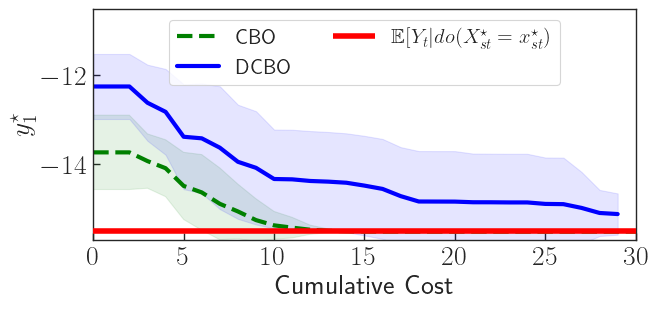

<Figure size 500x309.017 with 0 Axes>

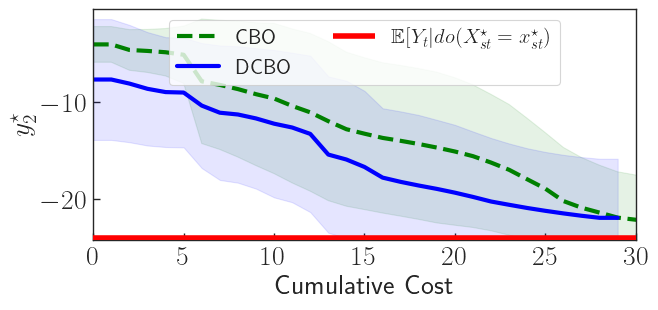

In [1134]:
# Plot
cost = 1
for t in range(T):
    plot_expected_opt_curve(t,
    best_objective_values[t],
    exp_per_trial_cost,
    exp_optimal_outcome_values_during_trials, 
    plot_params,
    filename='time_{}_cost_{}_n_{}'.format(t,cost,n_replicates))
plt.show()

In [1135]:
 mean_CBO = np.mean(np.vstack([exp_optimal_outcome_values_during_trials['CBO'][i][0] for i in range(T)]), axis = 0)
mean_DCBO = np.mean(np.vstack([exp_optimal_outcome_values_during_trials['DCBO'][i][0] for i in range(T)]), axis = 0)


In [1136]:
cost_CBO = np.mean(np.vstack([exp_per_trial_cost['CBO'][i] for i in range(T)]), axis = 0)
cost_DCBO = np.mean(np.vstack([exp_per_trial_cost['DCBO'][i] for i in range(T)]), axis = 0)
                   

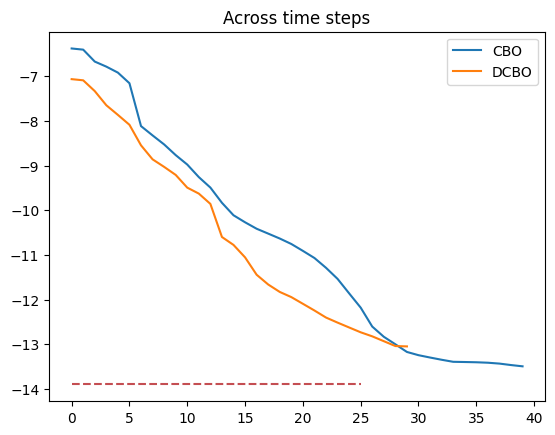

In [1154]:
plt.title('Across time steps')
plt.plot(cost_CBO, mean_CBO, label = 'CBO')
plt.plot(cost_DCBO, mean_DCBO, label = 'DCBO')
plt.hlines(np.mean([best_objective_values[i] for i in range(T)]),0,25,'r', ls='--')
plt.legend()
plt.show()